In [1]:
import sys
import os
import anndata as ad
import pandas as pd
import scanpy as sc
import re
import numpy as np
import seaborn as sns; sns.set(color_codes=True)
import scimap as sm  
from matplotlib import pyplot as plt
from matplotlib.patches import Patch
from scipy.stats import pearsonr
import scipy.stats as stats

os.chdir("C:/Users/tav9/Dropbox (HMS)/PCA_phaseII/cycif_analysis_materials/data/TV")
import napari

Running SCIMAP  2.1.0


In [2]:
adata=ad.read("C:/Users/tav9/Dropbox (HMS)/PCA_phaseII/cycif_analysis_materials/data/adata_e24_all_v4_09182023.h5ad")

C:\Users\tav9\AppData\Local\anaconda3\envs\scimap_new\lib\site-packages\anndata\__init__.py:55: FutureWarning:

`anndata.read` is deprecated, use `anndata.read_h5ad` instead. `ad.read` will be removed in mid 2024.



In [3]:
gate = pd.read_csv("C:/Users/tav9/Dropbox (HMS)/PCA_phaseII/gating_materials/gates/all_gates_cy13_v10_IRF1_regated.csv")
sm.pp.rescale(adata, gate=gate, log=True, imageid='imageid', failed_markers=None, method='all', random_state=0)

C:\Users\tav9\AppData\Local\anaconda3\envs\scimap_new\lib\site-packages\scimap\preprocessing\rescale.py:105: FutureWarning:

Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`



Scaling Image LSP11563
Scaling DNA1
Scaling MART1
Scaling CD207
Scaling SOX10
Scaling GZMB
Scaling CD163
Scaling CD1c
Scaling KRT14
Scaling CD3e
Scaling CD11c
Scaling CD8a
Scaling aSMA
Scaling CD20
Scaling CD68
Scaling PDL1
Scaling MITF
Scaling FOXP3
Scaling PD1
Scaling panCK
Scaling CD16
Scaling CD206
Scaling CD31
Scaling Vim
Scaling S100A
Scaling LAG3
Scaling CD56
Scaling pS6
Scaling HLA-A/B
Scaling SOX9
Scaling HLA-DPB1
Scaling PCNA
Scaling CD14
Scaling CD66b
Scaling pH3
Scaling LMNB2
Scaling Nestin
Scaling H3K27Me3
Scaling PRAME
Scaling TIGIT
Scaling TIM3
Scaling CD57
Scaling cPARP
Scaling DNA13
Scaling CD4
Scaling Ki67_2
Scaling IRF1
Scaling Image LSP11523
Scaling DNA1
Scaling MART1
Scaling CD207
Scaling SOX10
Scaling GZMB
Scaling CD163
Scaling CD1c
Scaling KRT14
Scaling CD3e
Scaling CD11c
Scaling CD8a
Scaling aSMA
Scaling CD20
Scaling CD68
Scaling PDL1
Scaling MITF
Scaling FOXP3
Scaling PD1
Scaling panCK
Scaling CD16
Scaling CD206
Scaling CD31
Scaling Vim
Scaling S100A
Scaling LA

AnnData object with n_obs × n_vars = 1421335 × 46
    obs: 'X_centroid', 'Y_centroid', 'Area', 'MajorAxisLength', 'MinorAxisLength', 'Eccentricity', 'Solidity', 'Extent', 'Orientation', 'CellID', 'imageid', 'ROI', 'ROI_major_category', 'ROI_minor_category', 'phenotype', 'phenotype_v2', 'MELid', 'ROI_LSP11347'
    uns: 'all_markers', 'gates'

In [4]:
sm.hl.classify(adata, pos=['IRF1'], neg=None, classify_label='IRF1+', phenotype='phenotype_v2', 
               subclassify_phenotype='Melanocyte', threshold=0.5, collapse_failed=False, label='IRF1pos')
rename= {'IRF1+': ['IRF1+'],
        'IRF1-':['Melanocyte']}
adata = sm.hl.rename(adata, rename, from_column='IRF1pos', to_column='IRF1pos')

Renaming IRF1+ to IRF1+
Renaming Melanocyte to IRF1-


In [5]:
adata

AnnData object with n_obs × n_vars = 1421335 × 46
    obs: 'X_centroid', 'Y_centroid', 'Area', 'MajorAxisLength', 'MinorAxisLength', 'Eccentricity', 'Solidity', 'Extent', 'Orientation', 'CellID', 'imageid', 'ROI', 'ROI_major_category', 'ROI_minor_category', 'phenotype', 'phenotype_v2', 'MELid', 'ROI_LSP11347', 'IRF1pos'
    uns: 'all_markers', 'gates'

In [6]:
#add the GeoMX ROI info to each sample


roi1 = pd.read_csv("C:/Users/tav9/Dropbox (HMS)/PCA_phaseII/cycif_analysis_materials/adata_initialization_e24/omero_roi_coordinates/CyCIF_GeoMX_coordinates/LSP11315.ome.tif-1677407-rois.csv")
adata=sm.hl.addROI_omero(adata, roi1, label='ROI_GeoMX', imageid='imageid', subset='LSP11315')

roi2 = pd.read_csv("C:/Users/tav9/Dropbox (HMS)/PCA_phaseII/cycif_analysis_materials/adata_initialization_e24/omero_roi_coordinates/CyCIF_GeoMX_coordinates/LSP11315.ome.tif-1677407-rois.csv")
adata=sm.hl.addROI_omero(adata, roi2, label='ROI_GeoMX', imageid='imageid', subset='LSP11315', overwrite=False)

roi3 = pd.read_csv("C:/Users/tav9/Dropbox (HMS)/PCA_phaseII/cycif_analysis_materials/adata_initialization_e24/omero_roi_coordinates/CyCIF_GeoMX_coordinates/LSP11347.ome.tif-1677230-rois.csv")
adata=sm.hl.addROI_omero(adata, roi3, label='ROI_GeoMX', subset='LSP11347',imageid='imageid', overwrite=False)

roi4 = pd.read_csv("C:/Users/tav9/Dropbox (HMS)/PCA_phaseII/cycif_analysis_materials/adata_initialization_e24/omero_roi_coordinates/CyCIF_GeoMX_coordinates/LSP11347.ome.tif-1677230-rois.csv")
adata=sm.hl.addROI_omero(adata, roi4, label='ROI_GeoMX', subset='LSP11347',imageid='imageid', overwrite=False)

roi5 = pd.read_csv("C:/Users/tav9/Dropbox (HMS)/PCA_phaseII/cycif_analysis_materials/adata_initialization_e24/omero_roi_coordinates/CyCIF_GeoMX_coordinates/LSP11355.ome.tif-1677231-rois.csv")
adata=sm.hl.addROI_omero(adata, roi5, label='ROI_GeoMX', subset='LSP11355',imageid='imageid', overwrite=False)

roi6 = pd.read_csv("C:/Users/tav9/Dropbox (HMS)/PCA_phaseII/cycif_analysis_materials/adata_initialization_e24/omero_roi_coordinates/CyCIF_GeoMX_coordinates/LSP11355.ome.tif-1677231-rois.csv")
adata=sm.hl.addROI_omero(adata, roi6, label='ROI_GeoMX', subset='LSP11355',imageid='imageid', overwrite=False)

roi7 = pd.read_csv("C:/Users/tav9/Dropbox (HMS)/PCA_phaseII/cycif_analysis_materials/adata_initialization_e24/omero_roi_coordinates/CyCIF_GeoMX_coordinates/LSP11403.ome.tif-1677239-rois.csv")
adata=sm.hl.addROI_omero(adata, roi7, label='ROI_GeoMX', subset='LSP11403',imageid='imageid', overwrite=False)

roi8 = pd.read_csv("C:/Users/tav9/Dropbox (HMS)/PCA_phaseII/cycif_analysis_materials/adata_initialization_e24/omero_roi_coordinates/CyCIF_GeoMX_coordinates/LSP11403.ome.tif-1677239-rois.csv")
adata=sm.hl.addROI_omero(adata, roi8, label='ROI_GeoMX', subset='LSP11403',imageid='imageid', overwrite=False)

roi9 = pd.read_csv("C:/Users/tav9/Dropbox (HMS)/PCA_phaseII/cycif_analysis_materials/adata_initialization_e24/omero_roi_coordinates/CyCIF_GeoMX_coordinates/LSP11523.ome.tif-1677272-rois.csv")
adata=sm.hl.addROI_omero(adata, roi9, label='ROI_GeoMX', subset='LSP11523',imageid='imageid', overwrite=False)

roi10 = pd.read_csv("C:/Users/tav9/Dropbox (HMS)/PCA_phaseII/cycif_analysis_materials/adata_initialization_e24/omero_roi_coordinates/CyCIF_GeoMX_coordinates/LSP11563.ome.tif-1677347-rois.csv")
adata=sm.hl.addROI_omero(adata, roi10, label='ROI_GeoMX', subset='LSP11563',imageid='imageid', overwrite=False)

roi11 = pd.read_csv("C:/Users/tav9/Dropbox (HMS)/PCA_phaseII/cycif_analysis_materials/adata_initialization_e24/omero_roi_coordinates/CyCIF_GeoMX_coordinates/LSP11387.ome.tif-1677647-rois.csv")
adata=sm.hl.addROI_omero(adata, roi11, label='ROI_GeoMX', subset='LSP11387',imageid='imageid', overwrite=False)

roi12 = pd.read_csv("C:/Users/tav9/Dropbox (HMS)/PCA_phaseII/cycif_analysis_materials/adata_initialization_e24/omero_roi_coordinates/CyCIF_GeoMX_coordinates/LSP11387.ome.tif-1677647-rois.csv")
adata=sm.hl.addROI_omero(adata, roi12, label='ROI_GeoMX', subset='LSP11387',imageid='imageid', overwrite=False)

roi13 = pd.read_csv("C:/Users/tav9/Dropbox (HMS)/PCA_phaseII/cycif_analysis_materials/adata_initialization_e24/omero_roi_coordinates/CyCIF_GeoMX_coordinates/LSP11691.ome.tif-1677373-rois.csv")
adata=sm.hl.addROI_omero(adata, roi13, label='ROI_GeoMX', subset='LSP11691',imageid='imageid', overwrite=False)

roi14 = pd.read_csv("C:/Users/tav9/Dropbox (HMS)/PCA_phaseII/cycif_analysis_materials/adata_initialization_e24/omero_roi_coordinates/CyCIF_GeoMX_coordinates/LSP11691.ome.tif-1677373-rois.csv")
adata=sm.hl.addROI_omero(adata, roi14, label='ROI_GeoMX', subset='LSP11691',imageid='imageid', overwrite=False)

roi15 = pd.read_csv("C:/Users/tav9/Dropbox (HMS)/PCA_phaseII/cycif_analysis_materials/adata_initialization_e24/omero_roi_coordinates/CyCIF_GeoMX_coordinates/LSP11419.ome.tif-1706090-rois.csv")
adata=sm.hl.addROI_omero(adata, roi15, label='ROI_GeoMX', subset='LSP11419',imageid='imageid', overwrite=False)

roi16 = pd.read_csv("C:/Users/tav9/Dropbox (HMS)/PCA_phaseII/cycif_analysis_materials/adata_initialization_e24/omero_roi_coordinates/CyCIF_GeoMX_coordinates/LSP11419.ome.tif-1706090-rois.csv")
adata=sm.hl.addROI_omero(adata, roi16, label='ROI_GeoMX', subset='LSP11419',imageid='imageid', overwrite=False)

roi17 = pd.read_csv("C:/Users/tav9/Dropbox (HMS)/PCA_phaseII/cycif_analysis_materials/adata_initialization_e24/omero_roi_coordinates/CyCIF_GeoMX_coordinates/LSP11395.ome.tif-1677238-rois.csv")
adata=sm.hl.addROI_omero(adata, roi17, label='ROI_GeoMX', subset='LSP11395',imageid='imageid', overwrite=False)

roi18 = pd.read_csv("C:/Users/tav9/Dropbox (HMS)/PCA_phaseII/cycif_analysis_materials/adata_initialization_e24/omero_roi_coordinates/CyCIF_GeoMX_coordinates/LSP11395.ome.tif-1677238-rois.csv")
adata=sm.hl.addROI_omero(adata, roi18, label='ROI_GeoMX', subset='LSP11395',imageid='imageid', overwrite=False)

roi19 = pd.read_csv("C:/Users/tav9/Dropbox (HMS)/PCA_phaseII/cycif_analysis_materials/adata_initialization_e24/omero_roi_coordinates/CyCIF_GeoMX_coordinates/LSP11643.ome.tif-1677679-rois.csv")
adata=sm.hl.addROI_omero(adata, roi19, label='ROI_GeoMX', subset='LSP11643',imageid='imageid', overwrite=False)

roi20 = pd.read_csv("C:/Users/tav9/Dropbox (HMS)/PCA_phaseII/cycif_analysis_materials/adata_initialization_e24/omero_roi_coordinates/CyCIF_GeoMX_coordinates/LSP11595.ome.tif-1677367-rois.csv")
adata=sm.hl.addROI_omero(adata, roi20, label='ROI_GeoMX', subset='LSP11595',imageid='imageid', overwrite=False)

roi21 = pd.read_csv("C:/Users/tav9/Dropbox (HMS)/PCA_phaseII/cycif_analysis_materials/adata_initialization_e24/omero_roi_coordinates/CyCIF_GeoMX_coordinates/LSP11587.ome.tif-1677366-rois.csv")
adata=sm.hl.addROI_omero(adata, roi21, label='ROI_GeoMX', subset='LSP11587',imageid='imageid', overwrite=False)

roi22 = pd.read_csv("C:/Users/tav9/Dropbox (HMS)/PCA_phaseII/cycif_analysis_materials/adata_initialization_e24/omero_roi_coordinates/CyCIF_GeoMX_coordinates/LSP11587.ome.tif-1677366-rois.csv")
adata=sm.hl.addROI_omero(adata, roi22, label='ROI_GeoMX', subset='LSP11587',imageid='imageid', overwrite=False)

roi23 = pd.read_csv("C:/Users/tav9/Dropbox (HMS)/PCA_phaseII/cycif_analysis_materials/adata_initialization_e24/omero_roi_coordinates/CyCIF_GeoMX_coordinates/LSP11411.ome.tif-1715366-rois.csv")
adata=sm.hl.addROI_omero(adata, roi23, label='ROI_GeoMX', subset='LSP11411',imageid='imageid', overwrite=False)

roi24 = pd.read_csv("C:/Users/tav9/Dropbox (HMS)/PCA_phaseII/cycif_analysis_materials/adata_initialization_e24/omero_roi_coordinates/CyCIF_GeoMX_coordinates/LSP11411.ome.tif-1715366-rois.csv")
adata=sm.hl.addROI_omero(adata, roi24, label='ROI_GeoMX', subset='LSP11411',imageid='imageid', overwrite=False)

roi25 = pd.read_csv("C:/Users/tav9/Dropbox (HMS)/PCA_phaseII/cycif_analysis_materials/adata_initialization_e24/omero_roi_coordinates/CyCIF_GeoMX_coordinates/LSP11627.ome.tif-1677369-rois.csv")
adata=sm.hl.addROI_omero(adata, roi25, label='ROI_GeoMX', subset='LSP11627',imageid='imageid', overwrite=False)

roi26 = pd.read_csv("C:/Users/tav9/Dropbox (HMS)/PCA_phaseII/cycif_analysis_materials/adata_initialization_e24/omero_roi_coordinates/CyCIF_GeoMX_coordinates/LSP11747.ome.tif-1677377-rois.csv")
adata=sm.hl.addROI_omero(adata, roi26, label='ROI_GeoMX', subset='LSP11747',imageid='imageid', overwrite=False)

roi27 = pd.read_csv("C:/Users/tav9/Dropbox (HMS)/PCA_phaseII/cycif_analysis_materials/adata_initialization_e24/omero_roi_coordinates/CyCIF_GeoMX_coordinates/LSP11667.ome.tif-1677372-rois.csv")
adata=sm.hl.addROI_omero(adata, roi27, label='ROI_GeoMX', subset='LSP11667',imageid='imageid', overwrite=False)

roi28 = pd.read_csv("C:/Users/tav9/Dropbox (HMS)/PCA_phaseII/cycif_analysis_materials/adata_initialization_e24/omero_roi_coordinates/CyCIF_GeoMX_coordinates/LSP11339.ome.tif-1677229-rois.csv")
adata=sm.hl.addROI_omero(adata, roi28, label='ROI_GeoMX', subset='LSP11339',imageid='imageid', overwrite=False)



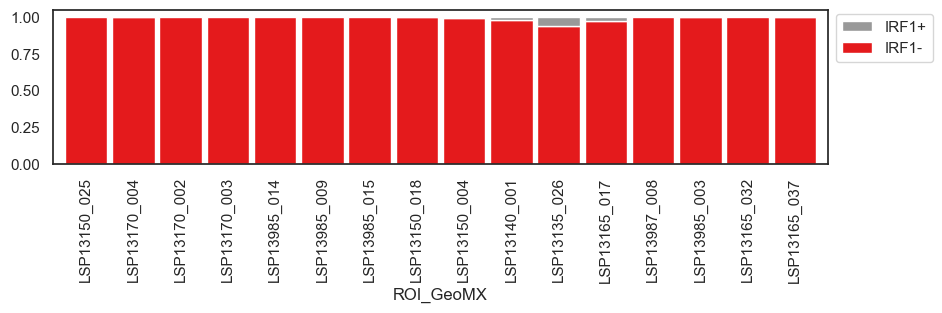

       ROI_GeoMX     IRF1-     IRF1+ breslow_status
0   LSP13150_025  1.000000  0.000000    low_entropy
1   LSP13170_004  0.997792  0.002208    low_entropy
2   LSP13170_002  1.000000  0.000000    low_entropy
3   LSP13170_003  1.000000  0.000000    low_entropy
4   LSP13985_014  1.000000  0.000000    low_entropy
5   LSP13985_009  1.000000  0.000000    low_entropy
6   LSP13985_015  1.000000  0.000000    low_entropy
7   LSP13150_018  0.998891  0.001109   high_entropy
8   LSP13150_004  0.994828  0.005172   high_entropy
9   LSP13140_001  0.979167  0.020833   high_entropy
10  LSP13135_026  0.941176  0.058824   high_entropy
11  LSP13165_017  0.973568  0.026432   high_entropy
12  LSP13987_008  1.000000  0.000000   high_entropy
13  LSP13985_003  0.998185  0.001815   high_entropy
14  LSP13165_032  1.000000  0.000000   high_entropy
15  LSP13165_037  0.998140  0.001860   high_entropy


In [35]:
subset=['LSP13150_025','LSP13170_004','LSP13170_002','LSP13170_003','LSP13985_014','LSP13985_009','LSP13985_015','LSP13150_018','LSP13150_004','LSP13140_001','LSP13135_026','LSP13165_017','LSP13987_008','LSP13985_003','LSP13165_032','LSP13165_037']
y=['IRF1-','IRF1+']
b=sm.pl.stacked_barplot(adata, y_axis='IRF1pos', x_axis='ROI_GeoMX', 
                      subset_xaxis=subset, subset_yaxis=y, order_xaxis=subset, order_yaxis=y, 
                      method='percent', figsize=(10,2), return_data=True)
b.to_csv(r"C:\Users\tav9\Dropbox (HMS)\test\IRF.csv")
b=pd.read_csv(r"C:\Users\tav9\Dropbox (HMS)\test\IRF.csv")
df2=pd.DataFrame(b)

low_entropy=['LSP13150_025','LSP13170_004','LSP13170_002','LSP13170_003','LSP13985_014','LSP13985_009','LSP13985_015']
high_entropy=['LSP13150_018','LSP13150_004','LSP13140_001','LSP13135_026','LSP13165_017','LSP13987_008','LSP13985_003','LSP13165_032','LSP13165_037']

# Add the recurrence_status column
df2['breslow_status'] = df2['ROI_GeoMX'].apply(lambda x: 'low_entropy' if x in low_entropy else 'high_entropy')
print(df2)

C:\Users\tav9\AppData\Local\Temp\ipykernel_46296\2684188175.py:5: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



p-value= 0.02374099974694539


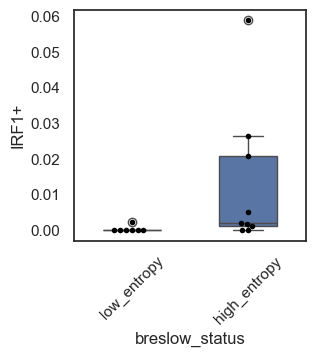

In [39]:
import scipy.stats as stats
plt.rcParams["figure.figsize"] = (3,3)
sns.swarmplot(data=df2,x='breslow_status',y='IRF1+',color='black',s=4,order=['low_entropy','high_entropy'])
ax=sns.boxplot(data=df2,x='breslow_status',y='IRF1+',width=.5, dodge=False,order=['low_entropy','high_entropy'])
ax.set_xticklabels(ax.get_xticklabels(),rotation=45)

group1=df2[df2['breslow_status']=='low_entropy']
group2=df2[df2['breslow_status']=='high_entropy']

statistic, p_value = stats.mannwhitneyu(group1['IRF1+'],group2['IRF1+'])
print("p-value=",p_value)
plt.savefig("C:/Users/tav9/Dropbox (HMS)/test/test/IRF1_entropygroups_e24.pdf")

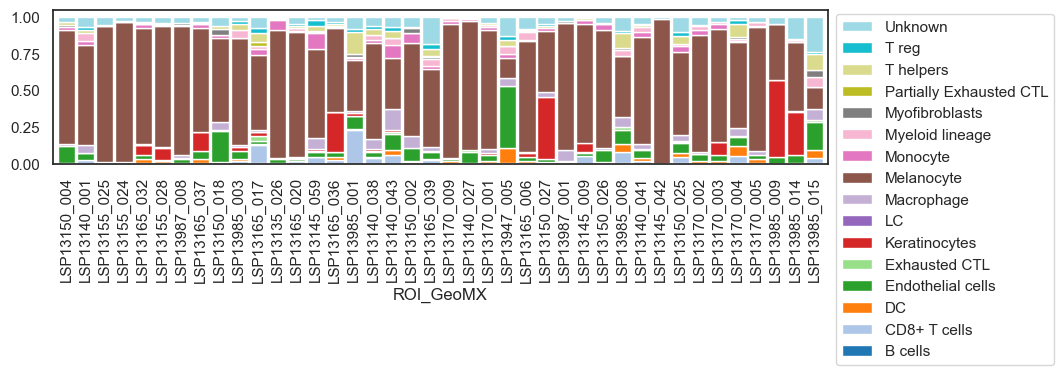

       ROI_GeoMX   B cells  CD8+ T cells        DC  Endothelial cells  \
0   LSP13150_004  0.000000      0.004021  0.002681           0.116622   
1   LSP13140_001  0.000000      0.023827  0.000000           0.046910   
2   LSP13155_025  0.000000      0.004061  0.001015           0.005076   
3   LSP13155_024  0.000000      0.000000  0.011076           0.003165   
4   LSP13165_032  0.000000      0.001327  0.027870           0.032515   
5   LSP13155_028  0.000000      0.007446  0.011914           0.002234   
6   LSP13987_008  0.000000      0.000000  0.003943           0.027603   
7   LSP13165_037  0.000000      0.003963  0.027741           0.055482   
8   LSP13150_018  0.000000      0.005711  0.002538           0.217005   
9   LSP13985_003  0.000000      0.021164  0.013228           0.054233   
10  LSP13165_017  0.003584      0.121864  0.010305           0.021953   
11  LSP13135_026  0.000000      0.004902  0.000000           0.024510   
12  LSP13165_020  0.000706      0.015537  0.004944 

In [9]:
#Using 20 high entropy VGP regions vs 20 low entropy VGP regions

subset=['LSP13150_004','LSP13140_001','LSP13155_025','LSP13155_024','LSP13165_032','LSP13155_028','LSP13987_008','LSP13165_037','LSP13150_018','LSP13985_003','LSP13165_017','LSP13135_026','LSP13165_020','LSP13145_059','LSP13165_036','LSP13985_001','LSP13140_038','LSP13140_043','LSP13150_002','LSP13165_039','LSP13170_009','LSP13140_027','LSP13170_001','LSP13947_005','LSP13165_006','LSP13150_027','LSP13987_001','LSP13145_009','LSP13150_026','LSP13985_008','LSP13140_041','LSP13145_042','LSP13150_025','LSP13170_002','LSP13170_003','LSP13170_004','LSP13170_005','LSP13985_009','LSP13985_014','LSP13985_015']

b=sm.pl.stacked_barplot(adata, y_axis='phenotype_v2', x_axis='ROI_GeoMX', 
                      subset_xaxis=subset, subset_yaxis=None, order_xaxis=subset, order_yaxis=None, 
                      method='percent', figsize=(10,2), return_data=True)
b.to_csv(r"C:\Users\tav9\Dropbox (HMS)\test\celltype.csv")
b=pd.read_csv(r"C:\Users\tav9\Dropbox (HMS)\test\celltype.csv")
df2=pd.DataFrame(b)

high_entropy_20=['LSP13150_004','LSP13140_001','LSP13155_025','LSP13155_024','LSP13165_032','LSP13155_028','LSP13987_008','LSP13165_037','LSP13150_018','LSP13985_003','LSP13165_017','LSP13135_026','LSP13165_020','LSP13145_059','LSP13165_036','LSP13985_001','LSP13140_038','LSP13140_043','LSP13150_002','LSP13165_039']
low_entropy_20=['LSP13170_009','LSP13140_027','LSP13170_001','LSP13947_005','LSP13165_006','LSP13150_027','LSP13987_001','LSP13145_009','LSP13150_026','LSP13985_008','LSP13140_041','LSP13145_042','LSP13150_025','LSP13170_002','LSP13170_003','LSP13170_004','LSP13170_005','LSP13985_009','LSP13985_014','LSP13985_015']

# Add the recurrence_status column
df2['breslow_status'] = df2['ROI_GeoMX'].apply(lambda x: 'low_entropy' if x in low_entropy_20 else 'high_entropy')
print(df2)


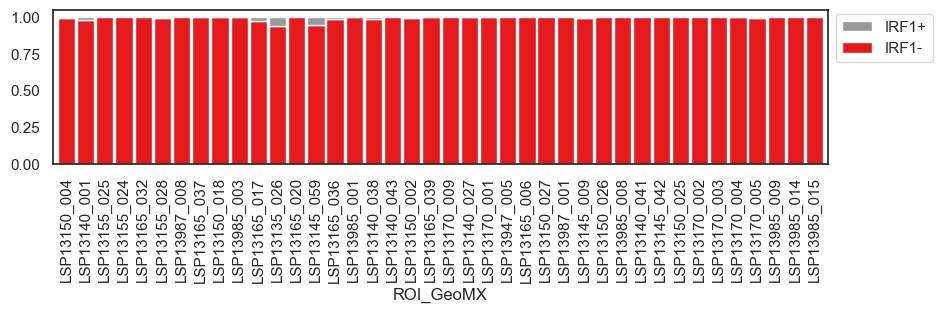

       ROI_GeoMX     IRF1-     IRF1+ breslow_status
0   LSP13150_004  0.994828  0.005172   high_entropy
1   LSP13140_001  0.979167  0.020833   high_entropy
2   LSP13155_025  1.000000  0.000000   high_entropy
3   LSP13155_024  1.000000  0.000000   high_entropy
4   LSP13165_032  1.000000  0.000000   high_entropy
5   LSP13155_028  0.992786  0.007214   high_entropy
6   LSP13987_008  1.000000  0.000000   high_entropy
7   LSP13165_037  0.998140  0.001860   high_entropy
8   LSP13150_018  0.998891  0.001109   high_entropy
9   LSP13985_003  0.998185  0.001815   high_entropy
10  LSP13165_017  0.973568  0.026432   high_entropy
11  LSP13135_026  0.941176  0.058824   high_entropy
12  LSP13165_020  1.000000  0.000000   high_entropy
13  LSP13145_059  0.944346  0.055654   high_entropy
14  LSP13165_036  0.985413  0.014587   high_entropy
15  LSP13985_001  0.997245  0.002755   high_entropy
16  LSP13140_038  0.989418  0.010582   high_entropy
17  LSP13140_043  1.000000  0.000000   high_entropy
18  LSP13150

In [40]:
subset=['LSP13150_004','LSP13140_001','LSP13155_025','LSP13155_024','LSP13165_032','LSP13155_028','LSP13987_008','LSP13165_037','LSP13150_018','LSP13985_003','LSP13165_017','LSP13135_026','LSP13165_020','LSP13145_059','LSP13165_036','LSP13985_001','LSP13140_038','LSP13140_043','LSP13150_002','LSP13165_039','LSP13170_009','LSP13140_027','LSP13170_001','LSP13947_005','LSP13165_006','LSP13150_027','LSP13987_001','LSP13145_009','LSP13150_026','LSP13985_008','LSP13140_041','LSP13145_042','LSP13150_025','LSP13170_002','LSP13170_003','LSP13170_004','LSP13170_005','LSP13985_009','LSP13985_014','LSP13985_015']

y=['IRF1-','IRF1+']
b=sm.pl.stacked_barplot(adata, y_axis='IRF1pos', x_axis='ROI_GeoMX', 
                      subset_xaxis=subset, subset_yaxis=y, order_xaxis=subset, order_yaxis=y, 
                      method='percent', figsize=(10,2), return_data=True)
b.to_csv(r"C:\Users\tav9\Dropbox (HMS)\test\IRF.csv")
b=pd.read_csv(r"C:\Users\tav9\Dropbox (HMS)\test\IRF.csv")
df2=pd.DataFrame(b)

high_entropy_20=['LSP13150_004','LSP13140_001','LSP13155_025','LSP13155_024','LSP13165_032','LSP13155_028','LSP13987_008','LSP13165_037','LSP13150_018','LSP13985_003','LSP13165_017','LSP13135_026','LSP13165_020','LSP13145_059','LSP13165_036','LSP13985_001','LSP13140_038','LSP13140_043','LSP13150_002','LSP13165_039']
low_entropy_20=['LSP13170_009','LSP13140_027','LSP13170_001','LSP13947_005','LSP13165_006','LSP13150_027','LSP13987_001','LSP13145_009','LSP13150_026','LSP13985_008','LSP13140_041','LSP13145_042','LSP13150_025','LSP13170_002','LSP13170_003','LSP13170_004','LSP13170_005','LSP13985_009','LSP13985_014','LSP13985_015']

# Add the recurrence_status column
df2['breslow_status'] = df2['ROI_GeoMX'].apply(lambda x: 'low_entropy' if x in low_entropy_20 else 'high_entropy')
print(df2)


C:\Users\tav9\AppData\Local\Temp\ipykernel_46296\1803347858.py:5: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


C:\Users\tav9\AppData\Local\Temp\ipykernel_46296\1803347858.py:6: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.

C:\Users\tav9\AppData\Local\anaconda3\envs\scimap_new\lib\site-packages\seaborn\categorical.py:3399: UserWarning:

25.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.



p-value= 0.0032915548629678165


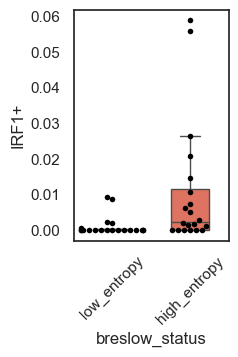

In [42]:
plt.rcParams["figure.figsize"] = (2,3)
my_pal = {"high_entropy": "#F2644B", "low_entropy": "#4783B5"}

sns.swarmplot(data=df2,x='breslow_status',y='IRF1+',color='black',s=4,order=['low_entropy','high_entropy'])
ax=sns.boxplot(data=df2,x='breslow_status',y='IRF1+',width=.5, dodge=False, palette=my_pal, fliersize=0,order=['low_entropy','high_entropy'])
ax.set_xticklabels(ax.get_xticklabels(),rotation=45)

group1=df2[df2['breslow_status']=='low_entropy']
group2=df2[df2['breslow_status']=='high_entropy']

statistic, p_value = stats.mannwhitneyu(group1['IRF1+'],group2['IRF1+'])
print("p-value=",p_value)
plt.savefig("C:/Users/tav9/Dropbox (HMS)/test/test/Tumor_IRF1pos_entropygroups_e24.pdf")

In [12]:
adata

AnnData object with n_obs × n_vars = 1421335 × 46
    obs: 'X_centroid', 'Y_centroid', 'Area', 'MajorAxisLength', 'MinorAxisLength', 'Eccentricity', 'Solidity', 'Extent', 'Orientation', 'CellID', 'imageid', 'ROI', 'ROI_major_category', 'ROI_minor_category', 'phenotype', 'phenotype_v2', 'MELid', 'ROI_LSP11347', 'IRF1pos', 'ROI_GeoMX'
    uns: 'all_markers', 'gates'

In [13]:
sm.hl.classify(adata, pos=['MART1'], neg=None, classify_label='MART1+', phenotype='phenotype_v2', 
               subclassify_phenotype='Melanocyte', threshold=0.5, collapse_failed=False, label='MART1pos')
rename= {'MART1+': ['MART1+'],
        'MART1-':['Melanocyte']}
adata = sm.hl.rename(adata, rename, from_column='MART1pos', to_column='MART1pos')

Renaming MART1+ to MART1+
Renaming Melanocyte to MART1-


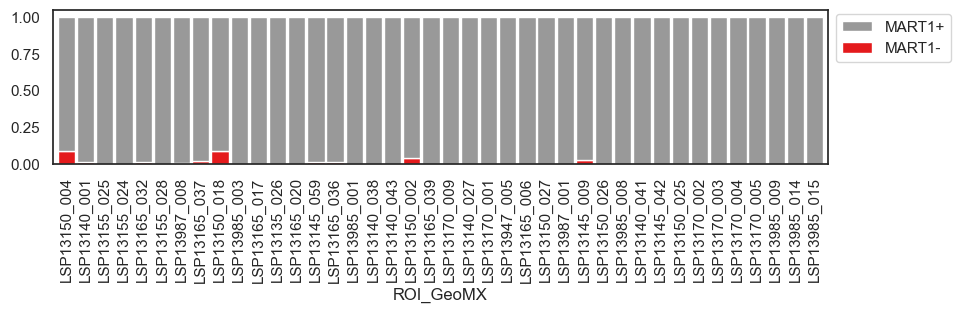

       ROI_GeoMX    MART1-    MART1+ breslow_status
0   LSP13150_004  0.086207  0.913793   high_entropy
1   LSP13140_001  0.009868  0.990132   high_entropy
2   LSP13155_025  0.000000  1.000000   high_entropy
3   LSP13155_024  0.000000  1.000000   high_entropy
4   LSP13165_032  0.008410  0.991590   high_entropy
5   LSP13155_028  0.000000  1.000000   high_entropy
6   LSP13987_008  0.006284  0.993716   high_entropy
7   LSP13165_037  0.018605  0.981395   high_entropy
8   LSP13150_018  0.087583  0.912417   high_entropy
9   LSP13985_003  0.000000  1.000000   high_entropy
10  LSP13165_017  0.000000  1.000000   high_entropy
11  LSP13135_026  0.000000  1.000000   high_entropy
12  LSP13165_020  0.000000  1.000000   high_entropy
13  LSP13145_059  0.010601  0.989399   high_entropy
14  LSP13165_036  0.008104  0.991896   high_entropy
15  LSP13985_001  0.000000  1.000000   high_entropy
16  LSP13140_038  0.000000  1.000000   high_entropy
17  LSP13140_043  0.000000  1.000000   high_entropy
18  LSP13150

In [14]:
subset=['LSP13150_004','LSP13140_001','LSP13155_025','LSP13155_024','LSP13165_032','LSP13155_028','LSP13987_008','LSP13165_037','LSP13150_018','LSP13985_003','LSP13165_017','LSP13135_026','LSP13165_020','LSP13145_059','LSP13165_036','LSP13985_001','LSP13140_038','LSP13140_043','LSP13150_002','LSP13165_039','LSP13170_009','LSP13140_027','LSP13170_001','LSP13947_005','LSP13165_006','LSP13150_027','LSP13987_001','LSP13145_009','LSP13150_026','LSP13985_008','LSP13140_041','LSP13145_042','LSP13150_025','LSP13170_002','LSP13170_003','LSP13170_004','LSP13170_005','LSP13985_009','LSP13985_014','LSP13985_015']

y=['MART1-','MART1+']
b=sm.pl.stacked_barplot(adata, y_axis='MART1pos', x_axis='ROI_GeoMX', 
                      subset_xaxis=subset, subset_yaxis=y, order_xaxis=subset, order_yaxis=y, 
                      method='percent', figsize=(10,2), return_data=True)
b.to_csv(r"C:\Users\tav9\Dropbox (HMS)\test\IRF.csv")
b=pd.read_csv(r"C:\Users\tav9\Dropbox (HMS)\test\IRF.csv")
df2=pd.DataFrame(b)

high_entropy_20=['LSP13150_004','LSP13140_001','LSP13155_025','LSP13155_024','LSP13165_032','LSP13155_028','LSP13987_008','LSP13165_037','LSP13150_018','LSP13985_003','LSP13165_017','LSP13135_026','LSP13165_020','LSP13145_059','LSP13165_036','LSP13985_001','LSP13140_038','LSP13140_043','LSP13150_002','LSP13165_039']
low_entropy_20=['LSP13170_009','LSP13140_027','LSP13170_001','LSP13947_005','LSP13165_006','LSP13150_027','LSP13987_001','LSP13145_009','LSP13150_026','LSP13985_008','LSP13140_041','LSP13145_042','LSP13150_025','LSP13170_002','LSP13170_003','LSP13170_004','LSP13170_005','LSP13985_009','LSP13985_014','LSP13985_015']

# Add the recurrence_status column
df2['breslow_status'] = df2['ROI_GeoMX'].apply(lambda x: 'low_entropy' if x in low_entropy_20 else 'high_entropy')
print(df2)


p-value= 0.005529680450283239


C:\Users\tav9\AppData\Local\Temp\ipykernel_46296\3944323014.py:5: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


C:\Users\tav9\AppData\Local\Temp\ipykernel_46296\3944323014.py:6: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.

C:\Users\tav9\AppData\Local\anaconda3\envs\scimap_new\lib\site-packages\seaborn\categorical.py:3399: UserWarning:

40.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.



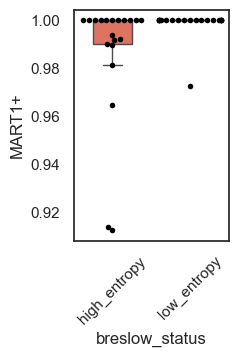

In [15]:
plt.rcParams["figure.figsize"] = (2,3)
my_pal = {"high_entropy": "#F2644B", "low_entropy": "#4783B5"}

sns.swarmplot(data=df2,x='breslow_status',y='MART1+',color='black',s=4)
ax=sns.boxplot(data=df2,x='breslow_status',y='MART1+',width=.5, dodge=False, palette=my_pal, fliersize=0)
ax.set_xticklabels(ax.get_xticklabels(),rotation=45)

group1=df2[df2['breslow_status']=='low_entropy']
group2=df2[df2['breslow_status']=='high_entropy']

statistic, p_value = stats.mannwhitneyu(group1['MART1+'],group2['MART1+'])
print("p-value=",p_value)
plt.savefig("C:/Users/tav9/Dropbox (HMS)/test/test/Tumor_MART1pos_entropygroups_e24.pdf")

In [16]:
sm.hl.classify(adata, pos=['Ki67_2'], neg=None, classify_label='Ki67+', phenotype='phenotype_v2', 
               subclassify_phenotype='Melanocyte', threshold=0.5, collapse_failed=False, label='Ki67pos')
rename= {'Ki67+': ['Ki67+'],
        'Ki67-':['Melanocyte']}
adata = sm.hl.rename(adata, rename, from_column='Ki67pos', to_column='Ki67pos')

Renaming Ki67+ to Ki67+
Renaming Melanocyte to Ki67-


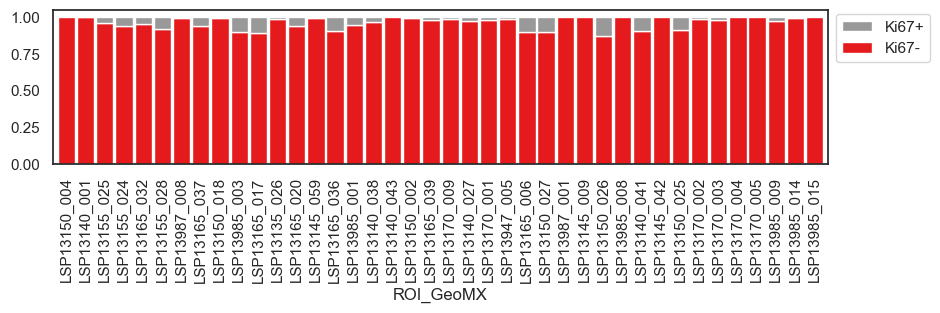

       ROI_GeoMX     Ki67-     Ki67+ breslow_status
0   LSP13150_004  1.000000  0.000000   high_entropy
1   LSP13140_001  0.997807  0.002193   high_entropy
2   LSP13155_025  0.957096  0.042904   high_entropy
3   LSP13155_024  0.936667  0.063333   high_entropy
4   LSP13165_032  0.951220  0.048780   high_entropy
5   LSP13155_028  0.920649  0.079351   high_entropy
6   LSP13987_008  0.991023  0.008977   high_entropy
7   LSP13165_037  0.940465  0.059535   high_entropy
8   LSP13150_018  0.992239  0.007761   high_entropy
9   LSP13985_003  0.900181  0.099819   high_entropy
10  LSP13165_017  0.890749  0.109251   high_entropy
11  LSP13135_026  0.983193  0.016807   high_entropy
12  LSP13165_020  0.938436  0.061564   high_entropy
13  LSP13145_059  0.996466  0.003534   high_entropy
14  LSP13165_036  0.905997  0.094003   high_entropy
15  LSP13985_001  0.947658  0.052342   high_entropy
16  LSP13140_038  0.962963  0.037037   high_entropy
17  LSP13140_043  1.000000  0.000000   high_entropy
18  LSP13150

In [17]:
subset=['LSP13150_004','LSP13140_001','LSP13155_025','LSP13155_024','LSP13165_032','LSP13155_028','LSP13987_008','LSP13165_037','LSP13150_018','LSP13985_003','LSP13165_017','LSP13135_026','LSP13165_020','LSP13145_059','LSP13165_036','LSP13985_001','LSP13140_038','LSP13140_043','LSP13150_002','LSP13165_039','LSP13170_009','LSP13140_027','LSP13170_001','LSP13947_005','LSP13165_006','LSP13150_027','LSP13987_001','LSP13145_009','LSP13150_026','LSP13985_008','LSP13140_041','LSP13145_042','LSP13150_025','LSP13170_002','LSP13170_003','LSP13170_004','LSP13170_005','LSP13985_009','LSP13985_014','LSP13985_015']

y=['Ki67-','Ki67+']
b=sm.pl.stacked_barplot(adata, y_axis='Ki67pos', x_axis='ROI_GeoMX', 
                      subset_xaxis=subset, subset_yaxis=y, order_xaxis=subset, order_yaxis=y, 
                      method='percent', figsize=(10,2), return_data=True)
b.to_csv(r"C:\Users\tav9\Dropbox (HMS)\test\IRF.csv")
b=pd.read_csv(r"C:\Users\tav9\Dropbox (HMS)\test\IRF.csv")
df2=pd.DataFrame(b)

high_entropy_20=['LSP13150_004','LSP13140_001','LSP13155_025','LSP13155_024','LSP13165_032','LSP13155_028','LSP13987_008','LSP13165_037','LSP13150_018','LSP13985_003','LSP13165_017','LSP13135_026','LSP13165_020','LSP13145_059','LSP13165_036','LSP13985_001','LSP13140_038','LSP13140_043','LSP13150_002','LSP13165_039']
low_entropy_20=['LSP13170_009','LSP13140_027','LSP13170_001','LSP13947_005','LSP13165_006','LSP13150_027','LSP13987_001','LSP13145_009','LSP13150_026','LSP13985_008','LSP13140_041','LSP13145_042','LSP13150_025','LSP13170_002','LSP13170_003','LSP13170_004','LSP13170_005','LSP13985_009','LSP13985_014','LSP13985_015']

# Add the recurrence_status column
df2['breslow_status'] = df2['ROI_GeoMX'].apply(lambda x: 'low_entropy' if x in low_entropy_20 else 'high_entropy')
print(df2)


p-value= 0.28257905940016514


C:\Users\tav9\AppData\Local\Temp\ipykernel_46296\3805046826.py:5: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


C:\Users\tav9\AppData\Local\Temp\ipykernel_46296\3805046826.py:6: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



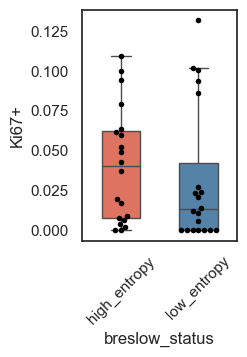

In [18]:
plt.rcParams["figure.figsize"] = (2,3)
my_pal = {"high_entropy": "#F2644B", "low_entropy": "#4783B5"}

sns.swarmplot(data=df2,x='breslow_status',y='Ki67+',color='black',s=4)
ax=sns.boxplot(data=df2,x='breslow_status',y='Ki67+',width=.5, dodge=False, palette=my_pal, fliersize=0)
ax.set_xticklabels(ax.get_xticklabels(),rotation=45)

group1=df2[df2['breslow_status']=='low_entropy']
group2=df2[df2['breslow_status']=='high_entropy']

statistic, p_value = stats.mannwhitneyu(group1['Ki67+'],group2['Ki67+'])
print("p-value=",p_value)
plt.savefig("C:/Users/tav9/Dropbox (HMS)/test/test/Tumor_Ki67pos_entropygroups_e24.pdf")

**calculate the proportion of immune cells out of all non-tumoral cells in high vs low entropy regions**

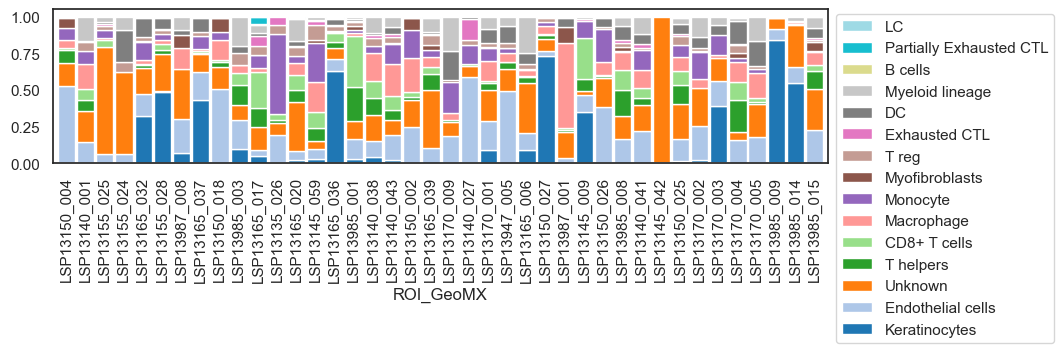

       ROI_GeoMX  Keratinocytes  Endothelial cells   Unknown  T helpers  \
0   LSP13150_004       0.000000           0.524096  0.156627   0.090361   
1   LSP13140_001       0.000000           0.146172  0.208817   0.076566   
2   LSP13155_025       0.000000           0.065789  0.723684   0.000000   
3   LSP13155_024       0.000000           0.062500  0.562500   0.000000   
4   LSP13165_032       0.320755           0.154088  0.176101   0.018868   
5   LSP13155_028       0.482906           0.012821  0.247863   0.025641   
6   LSP13987_008       0.071429           0.227273  0.344156   0.000000   
7   LSP13165_037       0.432802           0.191344  0.123007   0.004556   
8   LSP13150_018       0.000000           0.507418  0.148368   0.037092   
9   LSP13985_003       0.097561           0.200000  0.102439   0.136585   
10  LSP13165_017       0.047402           0.044667  0.157703   0.126709   
11  LSP13135_026       0.000000           0.196078  0.078431   0.019608   
12  LSP13165_020       0.

In [19]:
# calculate the proportion of immune cells out of all non-tumoral cells in high vs low entropy regions
subset=['LSP13150_004','LSP13140_001','LSP13155_025','LSP13155_024','LSP13165_032','LSP13155_028','LSP13987_008','LSP13165_037','LSP13150_018','LSP13985_003','LSP13165_017','LSP13135_026','LSP13165_020','LSP13145_059','LSP13165_036','LSP13985_001','LSP13140_038','LSP13140_043','LSP13150_002','LSP13165_039','LSP13170_009','LSP13140_027','LSP13170_001','LSP13947_005','LSP13165_006','LSP13150_027','LSP13987_001','LSP13145_009','LSP13150_026','LSP13985_008','LSP13140_041','LSP13145_042','LSP13150_025','LSP13170_002','LSP13170_003','LSP13170_004','LSP13170_005','LSP13985_009','LSP13985_014','LSP13985_015']

y=['Keratinocytes','Endothelial cells','Unknown','T helpers','CD8+ T cells','Macrophage','Monocyte','Myofibroblasts','T reg','Exhausted CTL','DC','Myeloid lineage','B cells','Partially Exhausted CTL','LC']
b=sm.pl.stacked_barplot(adata, y_axis='phenotype_v2', x_axis='ROI_GeoMX', 
                      subset_xaxis=subset, subset_yaxis=y, order_xaxis=subset, order_yaxis=y, 
                      method='percent', figsize=(10,2), return_data=True)
b.to_csv(r"C:\Users\tav9\Dropbox (HMS)\test\IRF.csv")
b=pd.read_csv(r"C:\Users\tav9\Dropbox (HMS)\test\IRF.csv")
df2=pd.DataFrame(b)

high_entropy_20=['LSP13150_004','LSP13140_001','LSP13155_025','LSP13155_024','LSP13165_032','LSP13155_028','LSP13987_008','LSP13165_037','LSP13150_018','LSP13985_003','LSP13165_017','LSP13135_026','LSP13165_020','LSP13145_059','LSP13165_036','LSP13985_001','LSP13140_038','LSP13140_043','LSP13150_002','LSP13165_039']
low_entropy_20=['LSP13170_009','LSP13140_027','LSP13170_001','LSP13947_005','LSP13165_006','LSP13150_027','LSP13987_001','LSP13145_009','LSP13150_026','LSP13985_008','LSP13140_041','LSP13145_042','LSP13150_025','LSP13170_002','LSP13170_003','LSP13170_004','LSP13170_005','LSP13985_009','LSP13985_014','LSP13985_015']

# Add the recurrence_status column
df2['breslow_status'] = df2['ROI_GeoMX'].apply(lambda x: 'low_entropy' if x in low_entropy_20 else 'high_entropy')
print(df2)




C:\Users\tav9\AppData\Local\Temp\ipykernel_46296\3373220303.py:5: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


C:\Users\tav9\AppData\Local\Temp\ipykernel_46296\3373220303.py:6: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



p-value= 0.2655155220983647


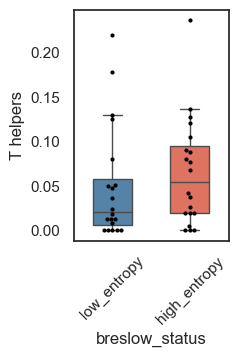

In [25]:
plt.rcParams["figure.figsize"] = (2,3)
my_pal = {"high_entropy": "#F2644B", "low_entropy": "#4783B5"}

sns.swarmplot(data=df2,x='breslow_status',y='T helpers',color='black',s=3,order=['low_entropy','high_entropy'])
ax=sns.boxplot(data=df2,x='breslow_status',y='T helpers',width=.5, palette=my_pal, fliersize=0,order=['low_entropy','high_entropy'])
ax.set_xticklabels(ax.get_xticklabels(),rotation=45)

group1=df2[df2['breslow_status']=='low_entropy']
group2=df2[df2['breslow_status']=='high_entropy']

statistic, p_value = stats.mannwhitneyu(group1['T helpers'],group2['T helpers'])
print("p-value=",p_value)
plt.savefig("C:/Users/tav9/Dropbox (HMS)/test/test/T_help_entropygroups_e24.pdf")

C:\Users\tav9\AppData\Local\Temp\ipykernel_46296\769628733.py:5: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


C:\Users\tav9\AppData\Local\Temp\ipykernel_46296\769628733.py:6: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



p-value= 0.005759480950171909


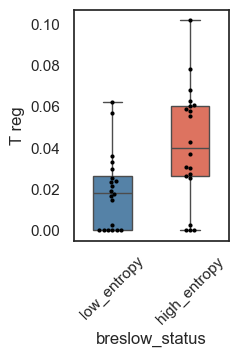

In [26]:
plt.rcParams["figure.figsize"] = (2,3)
my_pal = {"high_entropy": "#F2644B", "low_entropy": "#4783B5"}

sns.swarmplot(data=df2,x='breslow_status',y='T reg',color='black',s=3,order=['low_entropy','high_entropy'])
ax=sns.boxplot(data=df2,x='breslow_status',y='T reg',width=.5, palette=my_pal, fliersize=0,order=['low_entropy','high_entropy'])
ax.set_xticklabels(ax.get_xticklabels(),rotation=45)

group1=df2[df2['breslow_status']=='low_entropy']
group2=df2[df2['breslow_status']=='high_entropy']

statistic, p_value = stats.mannwhitneyu(group1['T reg'],group2['T reg'])
print("p-value=",p_value)
plt.savefig("C:/Users/tav9/Dropbox (HMS)/test/test/T_reg_entropygroups_e24.pdf")

C:\Users\tav9\AppData\Local\Temp\ipykernel_46296\44945701.py:5: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


C:\Users\tav9\AppData\Local\Temp\ipykernel_46296\44945701.py:6: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



p-value= 0.03775235548175383


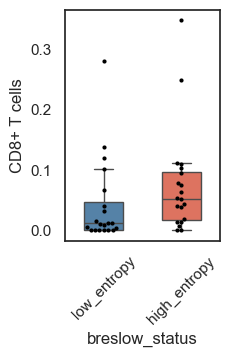

In [27]:
plt.rcParams["figure.figsize"] = (2,3)
my_pal = {"high_entropy": "#F2644B", "low_entropy": "#4783B5"}

sns.swarmplot(data=df2,x='breslow_status',y='CD8+ T cells',color='black',s=3,order=['low_entropy','high_entropy'])
ax=sns.boxplot(data=df2,x='breslow_status',y='CD8+ T cells',width=.5, palette=my_pal, fliersize=0,order=['low_entropy','high_entropy'])
ax.set_xticklabels(ax.get_xticklabels(),rotation=45)

group1=df2[df2['breslow_status']=='low_entropy']
group2=df2[df2['breslow_status']=='high_entropy']

statistic, p_value = stats.mannwhitneyu(group1['CD8+ T cells'],group2['CD8+ T cells'])
print("p-value=",p_value)
plt.savefig("C:/Users/tav9/Dropbox (HMS)/test/test/CD8Tcell_entropygroups_e24.pdf")

C:\Users\tav9\AppData\Local\Temp\ipykernel_46296\3981911780.py:5: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


C:\Users\tav9\AppData\Local\Temp\ipykernel_46296\3981911780.py:6: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



p-value= 0.9030259320733558


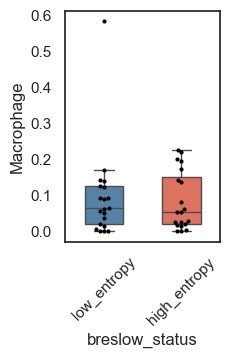

In [28]:
plt.rcParams["figure.figsize"] = (2,3)
my_pal = {"high_entropy": "#F2644B", "low_entropy": "#4783B5"}

sns.swarmplot(data=df2,x='breslow_status',y='Macrophage',color='black',s=3,order=['low_entropy','high_entropy'])
ax=sns.boxplot(data=df2,x='breslow_status',y='Macrophage',width=.5, palette=my_pal, fliersize=0,order=['low_entropy','high_entropy'])
ax.set_xticklabels(ax.get_xticklabels(),rotation=45)

group1=df2[df2['breslow_status']=='low_entropy']
group2=df2[df2['breslow_status']=='high_entropy']

statistic, p_value = stats.mannwhitneyu(group1['Macrophage'],group2['Macrophage'])
print("p-value=",p_value)

plt.savefig("C:/Users/tav9/Dropbox (HMS)/test/test/Macrophage_entropygroups_e24.pdf")

C:\Users\tav9\AppData\Local\Temp\ipykernel_46296\3014340038.py:5: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


C:\Users\tav9\AppData\Local\Temp\ipykernel_46296\3014340038.py:6: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



p-value= 0.5071065788999671


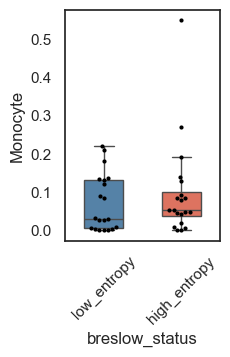

In [29]:
plt.rcParams["figure.figsize"] = (2,3)
my_pal = {"high_entropy": "#F2644B", "low_entropy": "#4783B5"}

sns.swarmplot(data=df2,x='breslow_status',y='Monocyte',color='black',s=3,order=['low_entropy','high_entropy'])
ax=sns.boxplot(data=df2,x='breslow_status',y='Monocyte',width=.5, palette=my_pal, fliersize=0,order=['low_entropy','high_entropy'])
ax.set_xticklabels(ax.get_xticklabels(),rotation=45)

group1=df2[df2['breslow_status']=='low_entropy']
group2=df2[df2['breslow_status']=='high_entropy']

statistic, p_value = stats.mannwhitneyu(group1['Monocyte'],group2['Monocyte'])
print("p-value=",p_value)
plt.savefig("C:/Users/tav9/Dropbox (HMS)/test/test/Monocyte_entropygroups_e24.pdf")

C:\Users\tav9\AppData\Local\Temp\ipykernel_46296\313619634.py:5: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


C:\Users\tav9\AppData\Local\Temp\ipykernel_46296\313619634.py:6: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



p-value= 0.8058617990865977


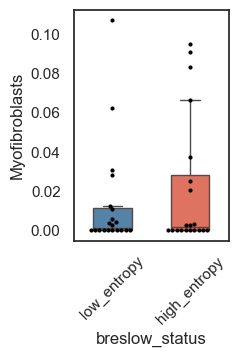

In [30]:
plt.rcParams["figure.figsize"] = (2,3)
my_pal = {"high_entropy": "#F2644B", "low_entropy": "#4783B5"}

sns.swarmplot(data=df2,x='breslow_status',y='Myofibroblasts',color='black',s=3,order=['low_entropy','high_entropy'])
ax=sns.boxplot(data=df2,x='breslow_status',y='Myofibroblasts',width=.5, palette=my_pal, fliersize=0,order=['low_entropy','high_entropy'])
ax.set_xticklabels(ax.get_xticklabels(),rotation=45)

group1=df2[df2['breslow_status']=='low_entropy']
group2=df2[df2['breslow_status']=='high_entropy']

statistic, p_value = stats.mannwhitneyu(group1['Myofibroblasts'],group2['Myofibroblasts'])
print("p-value=",p_value)
plt.savefig("C:/Users/tav9/Dropbox (HMS)/test/test/Myofibroblasts_entropygroups_e24.pdf")

C:\Users\tav9\AppData\Local\Temp\ipykernel_46296\1940747547.py:5: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


C:\Users\tav9\AppData\Local\Temp\ipykernel_46296\1940747547.py:6: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



p-value= 0.21375835729000547


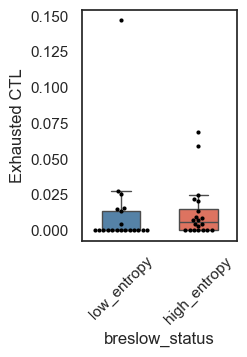

In [31]:
plt.rcParams["figure.figsize"] = (2,3)
my_pal = {"high_entropy": "#F2644B", "low_entropy": "#4783B5"}

sns.swarmplot(data=df2,x='breslow_status',y='Exhausted CTL',color='black',s=3,order=['low_entropy','high_entropy'])
ax=sns.boxplot(data=df2,x='breslow_status',y='Exhausted CTL',width=.5, palette=my_pal, fliersize=0,order=['low_entropy','high_entropy'])
ax.set_xticklabels(ax.get_xticklabels(),rotation=45)

group1=df2[df2['breslow_status']=='low_entropy']
group2=df2[df2['breslow_status']=='high_entropy']

statistic, p_value = stats.mannwhitneyu(group1['Exhausted CTL'],group2['Exhausted CTL'])
print("p-value=",p_value)
plt.savefig("C:/Users/tav9/Dropbox (HMS)/test/test/Exhausted CTL_entropygroups_e24.pdf")

C:\Users\tav9\AppData\Local\Temp\ipykernel_46296\2960722788.py:5: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


C:\Users\tav9\AppData\Local\Temp\ipykernel_46296\2960722788.py:6: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



p-value= 0.1260747205024796


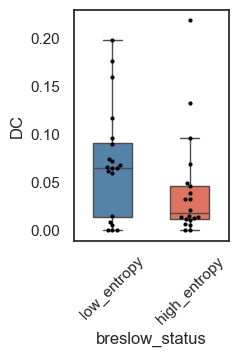

In [32]:
plt.rcParams["figure.figsize"] = (2,3)
my_pal = {"high_entropy": "#F2644B", "low_entropy": "#4783B5"}

sns.swarmplot(data=df2,x='breslow_status',y='DC',color='black',s=3,order=['low_entropy','high_entropy'])
ax=sns.boxplot(data=df2,x='breslow_status',y='DC',width=.5, palette=my_pal, fliersize=0,order=['low_entropy','high_entropy'])
ax.set_xticklabels(ax.get_xticklabels(),rotation=45)

group1=df2[df2['breslow_status']=='low_entropy']
group2=df2[df2['breslow_status']=='high_entropy']

statistic, p_value = stats.mannwhitneyu(group1['DC'],group2['DC'])
print("p-value=",p_value)
plt.savefig("C:/Users/tav9/Dropbox (HMS)/test/test/DC_entropygroups_e24.pdf")

C:\Users\tav9\AppData\Local\Temp\ipykernel_46296\2608981060.py:5: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


C:\Users\tav9\AppData\Local\Temp\ipykernel_46296\2608981060.py:6: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



p-value= 0.7350288083519299


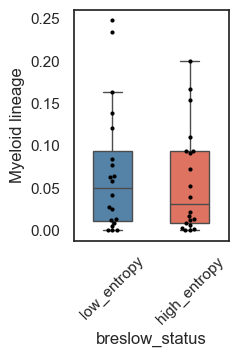

In [33]:
plt.rcParams["figure.figsize"] = (2,3)
my_pal = {"high_entropy": "#F2644B", "low_entropy": "#4783B5"}

sns.swarmplot(data=df2,x='breslow_status',y='Myeloid lineage',color='black',s=3,order=['low_entropy','high_entropy'])
ax=sns.boxplot(data=df2,x='breslow_status',y='Myeloid lineage',width=.5, palette=my_pal, fliersize=0,order=['low_entropy','high_entropy'])
ax.set_xticklabels(ax.get_xticklabels(),rotation=45)

group1=df2[df2['breslow_status']=='low_entropy']
group2=df2[df2['breslow_status']=='high_entropy']

statistic, p_value = stats.mannwhitneyu(group1['Myeloid lineage'],group2['Myeloid lineage'])
print("p-value=",p_value)
plt.savefig("C:/Users/tav9/Dropbox (HMS)/test/test/Myeloid_entropygroups_e24.pdf")

p-value= 0.5562517286918012


C:\Users\tav9\AppData\Local\Temp\ipykernel_46296\317070111.py:3: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.

C:\Users\tav9\AppData\Local\anaconda3\envs\scimap_new\lib\site-packages\seaborn\categorical.py:3399: UserWarning:

20.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.

C:\Users\tav9\AppData\Local\anaconda3\envs\scimap_new\lib\site-packages\seaborn\categorical.py:3399: UserWarning:

10.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.



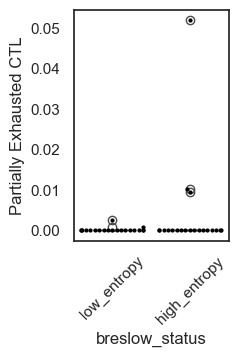

In [34]:
sns.swarmplot(data=df2,x='breslow_status',y='Partially Exhausted CTL',color='black',s=3,order=['low_entropy','high_entropy'])
ax=sns.boxplot(data=df2,x='breslow_status',y='Partially Exhausted CTL',width=.5,order=['low_entropy','high_entropy'])
ax.set_xticklabels(ax.get_xticklabels(),rotation=45)

group1=df2[df2['breslow_status']=='low_entropy']
group2=df2[df2['breslow_status']=='high_entropy']

statistic, p_value = stats.mannwhitneyu(group1['Partially Exhausted CTL'],group2['Partially Exhausted CTL'])
print("p-value=",p_value)

In [8]:
adata

AnnData object with n_obs × n_vars = 1421335 × 46
    obs: 'X_centroid', 'Y_centroid', 'Area', 'MajorAxisLength', 'MinorAxisLength', 'Eccentricity', 'Solidity', 'Extent', 'Orientation', 'CellID', 'imageid', 'ROI', 'ROI_major_category', 'ROI_minor_category', 'phenotype', 'phenotype_v2', 'MELid', 'ROI_LSP11347', 'IRF1pos', 'ROI_GeoMX', 'ROI_GeoMX_expanded', 'MART1pos', 'entropy_status'
    uns: 'all_markers', 'gates'

**the MART1 mean fluorescence intensity in high vs low entropy regions**

In [67]:
rename={'high_entropy':['LSP13150_004','LSP13140_001','LSP13155_025','LSP13155_024','LSP13165_032','LSP13155_028','LSP13987_008','LSP13165_037','LSP13150_018','LSP13985_003','LSP13165_017','LSP13135_026','LSP13165_020','LSP13145_059','LSP13165_036','LSP13985_001','LSP13140_038','LSP13140_043','LSP13150_002','LSP13165_039'],
'low_entropy':['LSP13170_009','LSP13140_027','LSP13170_001','LSP13947_005','LSP13165_006','LSP13150_027','LSP13987_001','LSP13145_009','LSP13150_026','LSP13985_008','LSP13140_041','LSP13145_042','LSP13150_025','LSP13170_002','LSP13170_003','LSP13170_004','LSP13170_005','LSP13985_009','LSP13985_014','LSP13985_015']}

adata = sm.hl.rename(adata, rename, from_column='ROI_GeoMX', to_column='entropy_status')

Renaming LSP13150_004 to high_entropy
Renaming LSP13140_001 to high_entropy
Renaming LSP13155_025 to high_entropy
Renaming LSP13155_024 to high_entropy
Renaming LSP13165_032 to high_entropy
Renaming LSP13155_028 to high_entropy
Renaming LSP13987_008 to high_entropy
Renaming LSP13165_037 to high_entropy
Renaming LSP13150_018 to high_entropy
Renaming LSP13985_003 to high_entropy
Renaming LSP13165_017 to high_entropy
Renaming LSP13135_026 to high_entropy
Renaming LSP13165_020 to high_entropy
Renaming LSP13145_059 to high_entropy
Renaming LSP13165_036 to high_entropy
Renaming LSP13985_001 to high_entropy
Renaming LSP13140_038 to high_entropy
Renaming LSP13140_043 to high_entropy
Renaming LSP13150_002 to high_entropy
Renaming LSP13165_039 to high_entropy
Renaming LSP13170_009 to low_entropy
Renaming LSP13140_027 to low_entropy
Renaming LSP13170_001 to low_entropy
Renaming LSP13947_005 to low_entropy
Renaming LSP13165_006 to low_entropy
Renaming LSP13150_027 to low_entropy
Renaming LSP13987_

In [68]:
group = ['Melanocyte']
adata_tumor=adata[(adata.obs['phenotype_v2'].isin(group))]

group1 = ['low_entropy','high_entropy']
adata_tumor=adata_tumor[(adata_tumor.obs['entropy_status'].isin(group1))]

marker_expression = adata_tumor.X[:, adata_tumor.var.index == "MART1"].squeeze()
geomx_data = adata_tumor.obs["ROI_GeoMX"]
entropy_data = adata_tumor.obs["entropy_status"]
df = pd.DataFrame({"marker_expression": marker_expression, "entropy_status": entropy_data, "geomx_ID": geomx_data})
print(df)

                              marker_expression entropy_status      geomx_ID
unmicst-LSP11563_cell_20564            0.799194   high_entropy  LSP13155_028
unmicst-LSP11563_cell_20587            0.869311   high_entropy  LSP13155_028
unmicst-LSP11563_cell_20606            0.838289   high_entropy  LSP13155_028
unmicst-LSP11563_cell_20607            0.864695   high_entropy  LSP13155_028
unmicst-LSP11563_cell_20614            0.862404   high_entropy  LSP13155_028
...                                         ...            ...           ...
unmicst-LSP11643_cell_103034           0.681116    low_entropy  LSP13987_001
unmicst-LSP11643_cell_103046           0.693450    low_entropy  LSP13987_001
unmicst-LSP11643_cell_103066           0.682498    low_entropy  LSP13987_001
unmicst-LSP11643_cell_103085           0.685143    low_entropy  LSP13987_001
unmicst-LSP11643_cell_103106           0.652968    low_entropy  LSP13987_001

[27080 rows x 3 columns]


In [69]:
result = df.groupby("geomx_ID").agg({"marker_expression": "mean"}).reset_index()

high_entropy_20=['LSP13150_004','LSP13140_001','LSP13155_025','LSP13155_024','LSP13165_032','LSP13155_028','LSP13987_008','LSP13165_037','LSP13150_018','LSP13985_003','LSP13165_017','LSP13135_026','LSP13165_020','LSP13145_059','LSP13165_036','LSP13985_001','LSP13140_038','LSP13140_043','LSP13150_002','LSP13165_039']
low_entropy_20=['LSP13170_009','LSP13140_027','LSP13170_001','LSP13947_005','LSP13165_006','LSP13150_027','LSP13987_001','LSP13145_009','LSP13150_026','LSP13985_008','LSP13140_041','LSP13145_042','LSP13150_025','LSP13170_002','LSP13170_003','LSP13170_004','LSP13170_005','LSP13985_009','LSP13985_014','LSP13985_015']

# Add the recurrence_status column
result['entropy_status'] = result['geomx_ID'].apply(lambda x: 'low_entropy' if x in low_entropy_20 else 'high_entropy')
print(result)

        geomx_ID  marker_expression entropy_status
0   LSP13135_026           0.816583   high_entropy
1   LSP13140_001           0.727741   high_entropy
2   LSP13140_027           0.784076    low_entropy
3   LSP13140_038           0.813686   high_entropy
4   LSP13140_041           0.747017    low_entropy
5   LSP13140_043           0.795101   high_entropy
6   LSP13145_009           0.708568    low_entropy
7   LSP13145_042           0.848952    low_entropy
8   LSP13145_059           0.796595   high_entropy
9   LSP13150_002           0.668434   high_entropy
10  LSP13150_004           0.563969   high_entropy
11  LSP13150_018           0.629092   high_entropy
12  LSP13150_025           0.805124    low_entropy
13  LSP13150_026           0.792368    low_entropy
14  LSP13150_027           0.836388    low_entropy
15  LSP13155_024           0.884531   high_entropy
16  LSP13155_025           0.855043   high_entropy
17  LSP13155_028           0.868864   high_entropy
18  LSP13165_006           0.83

C:\Users\tav9\AppData\Local\Temp\ipykernel_17948\259076991.py:5: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


C:\Users\tav9\AppData\Local\Temp\ipykernel_17948\259076991.py:6: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



p-value= 0.2616164678785774


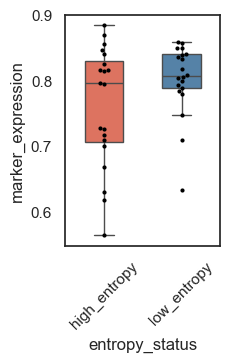

In [72]:
plt.rcParams["figure.figsize"] = (2,3)
my_pal = {"high_entropy": "#F2644B", "low_entropy": "#4783B5"}

sns.swarmplot(data=result,x='entropy_status',y='marker_expression',color='black',s=3)
ax=sns.boxplot(data=result,x='entropy_status',y='marker_expression',width=.5, palette=my_pal, fliersize=0)
ax.set_xticklabels(ax.get_xticklabels(),rotation=45)

group1=result[result['entropy_status']=='high_entropy']
group2=result[result['entropy_status']=='low_entropy']

statistic, p_value = stats.mannwhitneyu(group1['marker_expression'],group2['marker_expression'])
print("p-value=",p_value)
plt.savefig("C:/Users/tav9/Dropbox (HMS)/test/test/MART1_intensity_entropygroups_e24.pdf")

In [27]:
#add ROI info for the expanded regions surrounding the GeoMX regions

roi1 = pd.read_csv("C:/Users/tav9/HMS Dropbox/Tuulia Vallius/2024-Vallius-Novikov-Shi-Melanoma_PCA/data/e24/entropy_ROIs_expanded/LSP11339.ome.tif-1677229-rois.csv")
adata=sm.hl.addROI_omero(adata, roi1, label='ROI_GeoMX_expanded', imageid='imageid', subset='LSP11339')

roi2 = pd.read_csv("C:/Users/tav9/HMS Dropbox/Tuulia Vallius/2024-Vallius-Novikov-Shi-Melanoma_PCA/data/e24/entropy_ROIs_expanded/LSP11347.ome.tif-1677230-rois.csv")
adata=sm.hl.addROI_omero(adata, roi2, label='ROI_GeoMX_expanded', imageid='imageid', subset='LSP11347', overwrite=False)

roi3 = pd.read_csv("C:/Users/tav9/HMS Dropbox/Tuulia Vallius/2024-Vallius-Novikov-Shi-Melanoma_PCA/data/e24/entropy_ROIs_expanded/LSP11395.ome.tif-1677238-rois.csv")
adata=sm.hl.addROI_omero(adata, roi3, label='ROI_GeoMX_expanded', subset='LSP11395',imageid='imageid', overwrite=False)

roi4 = pd.read_csv("C:/Users/tav9/HMS Dropbox/Tuulia Vallius/2024-Vallius-Novikov-Shi-Melanoma_PCA/data/e24/entropy_ROIs_expanded/LSP11411.ome.tif-1715366-rois.csv")
adata=sm.hl.addROI_omero(adata, roi4, label='ROI_GeoMX_expanded', subset='LSP11411',imageid='imageid', overwrite=False)

roi5 = pd.read_csv("C:/Users/tav9/HMS Dropbox/Tuulia Vallius/2024-Vallius-Novikov-Shi-Melanoma_PCA/data/e24/entropy_ROIs_expanded/LSP11587.ome.tif-1677366-rois.csv")
adata=sm.hl.addROI_omero(adata, roi5, label='ROI_GeoMX_expanded', subset='LSP11587',imageid='imageid', overwrite=False)

roi6 = pd.read_csv("C:/Users/tav9/HMS Dropbox/Tuulia Vallius/2024-Vallius-Novikov-Shi-Melanoma_PCA/data/e24/entropy_ROIs_expanded/LSP11627.ome.tif-1677369-rois.csv")
adata=sm.hl.addROI_omero(adata, roi6, label='ROI_GeoMX_expanded', subset='LSP11627',imageid='imageid', overwrite=False)

roi7 = pd.read_csv("C:/Users/tav9/HMS Dropbox/Tuulia Vallius/2024-Vallius-Novikov-Shi-Melanoma_PCA/data/e24/entropy_ROIs_expanded/LSP11643.ome.tif-1677679-rois.csv")
adata=sm.hl.addROI_omero(adata, roi7, label='ROI_GeoMX_expanded', subset='LSP11643',imageid='imageid', overwrite=False)

roi8 = pd.read_csv("C:/Users/tav9/HMS Dropbox/Tuulia Vallius/2024-Vallius-Novikov-Shi-Melanoma_PCA/data/e24/entropy_ROIs_expanded/LSP11667.ome.tif-1677372-rois.csv")
adata=sm.hl.addROI_omero(adata, roi8, label='ROI_GeoMX_expanded', subset='LSP11667',imageid='imageid', overwrite=False)

roi9 = pd.read_csv("C:/Users/tav9/HMS Dropbox/Tuulia Vallius/2024-Vallius-Novikov-Shi-Melanoma_PCA/data/e24/entropy_ROIs_expanded/LSP11691.ome.tif-1677373-rois.csv")
adata=sm.hl.addROI_omero(adata, roi9, label='ROI_GeoMX_expanded', subset='LSP11691',imageid='imageid', overwrite=False)

roi10 = pd.read_csv("C:/Users/tav9/HMS Dropbox/Tuulia Vallius/2024-Vallius-Novikov-Shi-Melanoma_PCA/data/e24/entropy_ROIs_expanded/LSP11747.ome.tif-1677377-rois.csv")
adata=sm.hl.addROI_omero(adata, roi10, label='ROI_GeoMX_expanded', subset='LSP11747',imageid='imageid', overwrite=False)

In [28]:
adata

AnnData object with n_obs × n_vars = 1421335 × 46
    obs: 'X_centroid', 'Y_centroid', 'Area', 'MajorAxisLength', 'MinorAxisLength', 'Eccentricity', 'Solidity', 'Extent', 'Orientation', 'CellID', 'imageid', 'ROI', 'ROI_major_category', 'ROI_minor_category', 'phenotype', 'phenotype_v2', 'MELid', 'ROI_LSP11347', 'IRF1pos', 'ROI_GeoMX', 'ROI_GeoMX_expanded'
    uns: 'all_markers', 'gates'

In [29]:
adata.obs.ROI_GeoMX_expanded.value_counts()

ROI_GeoMX_expanded
Other                    1392662
LSP13165_017_expanded       3505
LSP13165_037_expanded       2634
LSP13165_032_expanded       2489
LSP13150_018_expanded       2462
LSP13150_025_expanded       2125
LSP13170_004_expanded       2102
LSP13140_001_expanded       1834
LSP13135_026_expanded       1793
LSP13987_008_expanded       1756
LSP13985_003_expanded       1614
LSP13985_014_expanded       1280
LSP13150_004_expanded       1230
LSP13985_015_expanded       1203
LSP13985_009_expanded        997
LSP13170_002_expanded        851
LSP13170_003_expanded        798
Name: count, dtype: int64

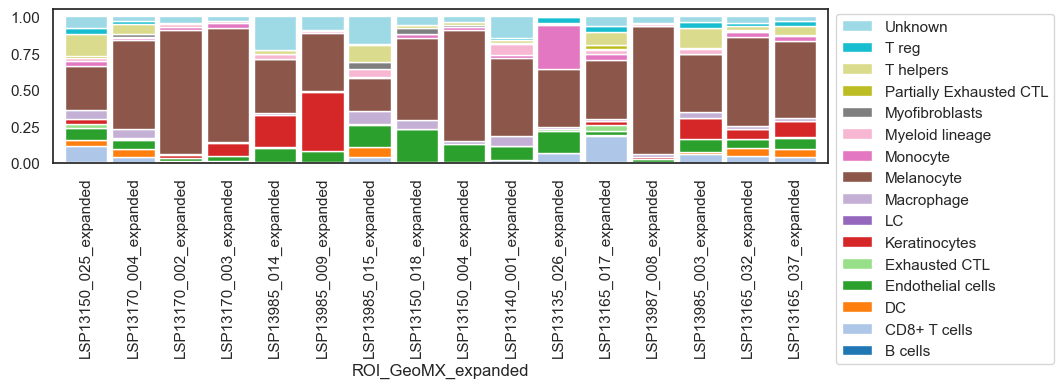

       ROI_GeoMX_expanded   B cells  CD8+ T cells        DC  \
0   LSP13150_025_expanded  0.006118      0.113412  0.038118   
1   LSP13170_004_expanded  0.001427      0.040438  0.057088   
2   LSP13170_002_expanded  0.000000      0.000000  0.011751   
3   LSP13170_003_expanded  0.000000      0.000000  0.015038   
4   LSP13985_014_expanded  0.000000      0.002344  0.007812   
5   LSP13985_009_expanded  0.000000      0.000000  0.006018   
6   LSP13985_015_expanded  0.003325      0.040732  0.065669   
7   LSP13150_018_expanded  0.000000      0.006499  0.001625   
8   LSP13150_004_expanded  0.000000      0.007317  0.001626   
9   LSP13140_001_expanded  0.000000      0.022356  0.000000   
10  LSP13135_026_expanded  0.001115      0.068042  0.000558   
11  LSP13165_017_expanded  0.007703      0.178887  0.007703   
12  LSP13987_008_expanded  0.000000      0.000000  0.005695   
13  LSP13985_003_expanded  0.000000      0.063817  0.014250   
14  LSP13165_032_expanded  0.001205      0.049016  0.05

In [31]:
low_entropy=['LSP13150_025_expanded','LSP13170_004_expanded','LSP13170_002_expanded','LSP13170_003_expanded','LSP13985_014_expanded','LSP13985_009_expanded','LSP13985_015_expanded']
high_entropy=['LSP13150_018_expanded','LSP13150_004_expanded','LSP13140_001_expanded','LSP13135_026_expanded','LSP13165_017_expanded','LSP13987_008_expanded','LSP13985_003_expanded','LSP13165_032_expanded','LSP13165_037_expanded']

subset=['LSP13150_025_expanded','LSP13170_004_expanded','LSP13170_002_expanded','LSP13170_003_expanded','LSP13985_014_expanded','LSP13985_009_expanded','LSP13985_015_expanded','LSP13150_018_expanded','LSP13150_004_expanded','LSP13140_001_expanded','LSP13135_026_expanded','LSP13165_017_expanded','LSP13987_008_expanded','LSP13985_003_expanded','LSP13165_032_expanded','LSP13165_037_expanded']

b=sm.pl.stacked_barplot(adata, y_axis='phenotype_v2', x_axis='ROI_GeoMX_expanded', 
                      subset_xaxis=subset, subset_yaxis=None, order_xaxis=subset, order_yaxis=None, 
                      method='percent', figsize=(10,2), return_data=True)
b.to_csv(r"C:\Users\tav9\Dropbox (HMS)\test\celltype.csv")
b=pd.read_csv(r"C:\Users\tav9\Dropbox (HMS)\test\celltype.csv")
df2=pd.DataFrame(b)

df2['entropy_status'] = df2['ROI_GeoMX_expanded'].apply(lambda x: 'low_entropy' if x in low_entropy else 'high_entropy')
print(df2)

C:\Users\tav9\AppData\Local\Temp\ipykernel_16808\4193473419.py:3: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



p-value= 0.6805944055944056


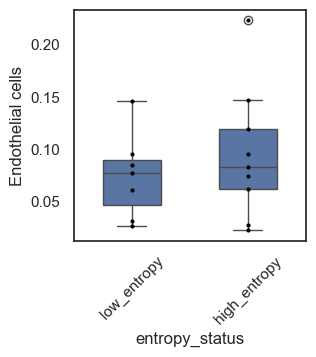

In [41]:
sns.swarmplot(data=df2,x='entropy_status',y='Endothelial cells',color='black',s=3)
ax=sns.boxplot(data=df2,x='entropy_status',y='Endothelial cells',width=.5)
ax.set_xticklabels(ax.get_xticklabels(),rotation=45)

group1=df2[df2['entropy_status']=='low_entropy']
group2=df2[df2['entropy_status']=='high_entropy']

statistic, p_value = stats.mannwhitneyu(group1['Endothelial cells'],group2['Endothelial cells'])
print("p-value=",p_value)
plt.savefig("C:/Users/tav9/Dropbox (HMS)/test/test/entropygroups_expandedROI_Endothelial cells.pdf")

In [43]:
sm.hl.classify(adata, pos=['MART1'], neg=None, classify_label='MART1+', phenotype='phenotype_v2', 
               subclassify_phenotype='Melanocyte', threshold=0.5, collapse_failed=False, label='MART1pos')
rename= {'MART1+': ['MART1+'],
        'MART1-':['Melanocyte']}
adata = sm.hl.rename(adata, rename, from_column='MART1pos', to_column='MART1pos')

Renaming MART1+ to MART1+
Renaming Melanocyte to MART1-


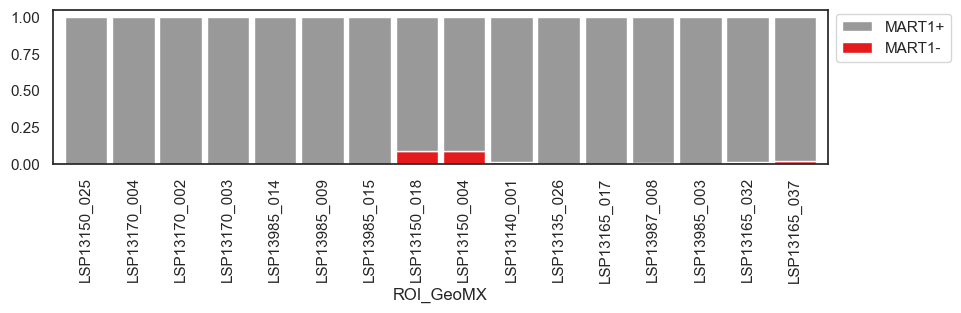

       ROI_GeoMX    MART1-    MART1+ entropy_status
0   LSP13150_025  0.000000  1.000000    low_entropy
1   LSP13170_004  0.000000  1.000000    low_entropy
2   LSP13170_002  0.000000  1.000000    low_entropy
3   LSP13170_003  0.000000  1.000000    low_entropy
4   LSP13985_014  0.000000  1.000000    low_entropy
5   LSP13985_009  0.000000  1.000000    low_entropy
6   LSP13985_015  0.000000  1.000000    low_entropy
7   LSP13150_018  0.087583  0.912417   high_entropy
8   LSP13150_004  0.086207  0.913793   high_entropy
9   LSP13140_001  0.009868  0.990132   high_entropy
10  LSP13135_026  0.000000  1.000000   high_entropy
11  LSP13165_017  0.000000  1.000000   high_entropy
12  LSP13987_008  0.006284  0.993716   high_entropy
13  LSP13985_003  0.000000  1.000000   high_entropy
14  LSP13165_032  0.008410  0.991590   high_entropy
15  LSP13165_037  0.018605  0.981395   high_entropy


In [45]:
subset=['LSP13150_025','LSP13170_004','LSP13170_002','LSP13170_003','LSP13985_014','LSP13985_009','LSP13985_015','LSP13150_018','LSP13150_004','LSP13140_001','LSP13135_026','LSP13165_017','LSP13987_008','LSP13985_003','LSP13165_032','LSP13165_037']
y=['MART1-','MART1+']
b=sm.pl.stacked_barplot(adata, y_axis='MART1pos', x_axis='ROI_GeoMX', 
                      subset_xaxis=subset, subset_yaxis=y, order_xaxis=subset, order_yaxis=y, 
                      method='percent', figsize=(10,2), return_data=True)
b.to_csv(r"C:\Users\tav9\Dropbox (HMS)\test\MART1.csv")
b=pd.read_csv(r"C:\Users\tav9\Dropbox (HMS)\test\MART1.csv")
df2=pd.DataFrame(b)

low_entropy=['LSP13150_025','LSP13170_004','LSP13170_002','LSP13170_003','LSP13985_014','LSP13985_009','LSP13985_015']
high_entropy=['LSP13150_018','LSP13150_004','LSP13140_001','LSP13135_026','LSP13165_017','LSP13987_008','LSP13985_003','LSP13165_032','LSP13165_037']

# Add the recurrence_status column
df2['entropy_status'] = df2['ROI_GeoMX'].apply(lambda x: 'low_entropy' if x in low_entropy else 'high_entropy')
print(df2)

In [48]:
adata

AnnData object with n_obs × n_vars = 1421335 × 46
    obs: 'X_centroid', 'Y_centroid', 'Area', 'MajorAxisLength', 'MinorAxisLength', 'Eccentricity', 'Solidity', 'Extent', 'Orientation', 'CellID', 'imageid', 'ROI', 'ROI_major_category', 'ROI_minor_category', 'phenotype', 'phenotype_v2', 'MELid', 'ROI_LSP11347', 'IRF1pos', 'ROI_GeoMX', 'ROI_GeoMX_expanded', 'MART1pos'
    uns: 'all_markers', 'gates'

In [49]:
rename= {'low_entropy':['LSP13150_025','LSP13170_004','LSP13170_002','LSP13170_003','LSP13985_014','LSP13985_009','LSP13985_015'],
'high_entropy':['LSP13150_018','LSP13150_004','LSP13140_001','LSP13135_026','LSP13165_017','LSP13987_008','LSP13985_003','LSP13165_032','LSP13165_037']}
adata = sm.hl.rename(adata, rename, from_column='ROI_GeoMX', to_column='entropy_status')

Renaming LSP13150_025 to low_entropy
Renaming LSP13170_004 to low_entropy
Renaming LSP13170_002 to low_entropy
Renaming LSP13170_003 to low_entropy
Renaming LSP13985_014 to low_entropy
Renaming LSP13985_009 to low_entropy
Renaming LSP13985_015 to low_entropy
Renaming LSP13150_018 to high_entropy
Renaming LSP13150_004 to high_entropy
Renaming LSP13140_001 to high_entropy
Renaming LSP13135_026 to high_entropy
Renaming LSP13165_017 to high_entropy
Renaming LSP13987_008 to high_entropy
Renaming LSP13985_003 to high_entropy
Renaming LSP13165_032 to high_entropy
Renaming LSP13165_037 to high_entropy


In [74]:
group = ['Melanocyte']
adata_tumor=adata[(adata.obs['phenotype_v2'].isin(group))]

group1 = ['low_entropy','high_entropy']
adata_tumor=adata_tumor[(adata_tumor.obs['entropy_status'].isin(group1))]

marker_expression = adata_tumor.X[:, adata_tumor.var.index == "MART1"].squeeze()
geomx_data = adata_tumor.obs["ROI_GeoMX"]
entropy_data = adata_tumor.obs["entropy_status"]
df = pd.DataFrame({"marker_expression": marker_expression, "entropy_status": entropy_data, "geomx_ID": geomx_data})
print(df)

                             marker_expression entropy_status      geomx_ID
unmicst-LSP11587_cell_22087           0.643557   high_entropy  LSP13140_001
unmicst-LSP11587_cell_22093           0.730124   high_entropy  LSP13140_001
unmicst-LSP11587_cell_22103           0.701893   high_entropy  LSP13140_001
unmicst-LSP11587_cell_22145           0.812959   high_entropy  LSP13140_001
unmicst-LSP11587_cell_22149           0.757743   high_entropy  LSP13140_001
...                                        ...            ...           ...
unmicst-LSP11643_cell_72853           0.676681   high_entropy  LSP13987_008
unmicst-LSP11643_cell_72860           0.621855   high_entropy  LSP13987_008
unmicst-LSP11643_cell_72867           0.611917   high_entropy  LSP13987_008
unmicst-LSP11643_cell_72870           0.644157   high_entropy  LSP13987_008
unmicst-LSP11643_cell_72874           0.631162   high_entropy  LSP13987_008

[10623 rows x 3 columns]


        geomx_ID  marker_expression entropy_status
0   LSP13135_026           0.816583   high_entropy
1   LSP13140_001           0.727741   high_entropy
2   LSP13150_004           0.563969   high_entropy
3   LSP13150_018           0.629092   high_entropy
4   LSP13150_025           0.805124    low_entropy
5   LSP13165_017           0.841071   high_entropy
6   LSP13165_032           0.716887   high_entropy
7   LSP13165_037           0.708478   high_entropy
8   LSP13170_002           0.779494    low_entropy
9   LSP13170_003           0.808889    low_entropy
10  LSP13170_004           0.799309    low_entropy
11  LSP13985_003           0.825020   high_entropy
12  LSP13985_009           0.849514    low_entropy
13  LSP13985_014           0.856488    low_entropy
14  LSP13985_015           0.859430    low_entropy
15  LSP13987_008           0.617456   high_entropy
p-value= 0.04178321678321679


C:\Users\tav9\AppData\Local\Temp\ipykernel_16808\2783983116.py:12: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



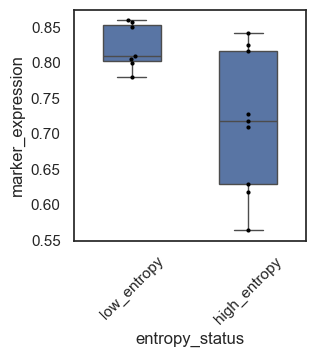

In [76]:
result = df.groupby("geomx_ID").agg({"marker_expression": "mean"}).reset_index()

low_entropy=['LSP13150_025','LSP13170_004','LSP13170_002','LSP13170_003','LSP13985_014','LSP13985_009','LSP13985_015']
high_entropy=['LSP13150_018','LSP13150_004','LSP13140_001','LSP13135_026','LSP13165_017','LSP13987_008','LSP13985_003','LSP13165_032','LSP13165_037']

result['entropy_status'] = result['geomx_ID'].apply(lambda x: 'low_entropy' if x in low_entropy else 'high_entropy')
print(result)
result=result.sort_values(by='entropy_status', ascending=False)

sns.swarmplot(data=result,x='entropy_status',y='marker_expression',color='black',s=3)
ax=sns.boxplot(data=result,x='entropy_status',y='marker_expression',width=.5)
ax.set_xticklabels(ax.get_xticklabels(),rotation=45)

group1=result[result['entropy_status']=='high_entropy']
group2=result[result['entropy_status']=='low_entropy']

statistic, p_value = stats.mannwhitneyu(group1['marker_expression'],group2['marker_expression'])
print("p-value=",p_value)
plt.savefig("C:/Users/tav9/Dropbox (HMS)/test/test/entropy_regions_MART1_expression_e41.pdf")

In [78]:
adata.var.index

Index(['DNA1', 'MART1', 'CD207', 'SOX10', 'GZMB', 'CD163', 'CD1c', 'KRT14',
       'CD3e', 'CD11c', 'CD8a', 'aSMA', 'CD20', 'CD68', 'PDL1', 'MITF',
       'FOXP3', 'PD1', 'panCK', 'CD16', 'CD206', 'CD31', 'Vim', 'S100A',
       'LAG3', 'CD56', 'pS6', 'HLA-A/B', 'SOX9', 'HLA-DPB1', 'PCNA', 'CD14',
       'CD66b', 'pH3', 'LMNB2', 'Nestin', 'H3K27Me3', 'PRAME', 'TIGIT', 'TIM3',
       'CD57', 'cPARP', 'DNA13', 'CD4', 'Ki67_2', 'IRF1'],
      dtype='object')

In [79]:
adata.write("./e24_entropy_cycif_mapping_09122024.h5ad")

In [3]:
adata=ad.read("./e24_entropy_cycif_mapping_09122024.h5ad")

C:\Users\tav9\AppData\Local\anaconda3\envs\scimap_new\lib\site-packages\anndata\__init__.py:55: FutureWarning:

`anndata.read` is deprecated, use `anndata.read_h5ad` instead. `ad.read` will be removed in mid 2024.



In [4]:
adata

AnnData object with n_obs × n_vars = 1421335 × 46
    obs: 'X_centroid', 'Y_centroid', 'Area', 'MajorAxisLength', 'MinorAxisLength', 'Eccentricity', 'Solidity', 'Extent', 'Orientation', 'CellID', 'imageid', 'ROI', 'ROI_major_category', 'ROI_minor_category', 'phenotype', 'phenotype_v2', 'MELid', 'ROI_LSP11347', 'IRF1pos', 'ROI_GeoMX', 'ROI_GeoMX_expanded', 'MART1pos', 'entropy_status'
    uns: 'all_markers', 'gates'

In [5]:
adata.obs.phenotype_v2.value_counts()

phenotype_v2
Melanocyte                 359098
Keratinocytes              268328
Endothelial cells          156535
Unknown                    135870
T helpers                  107749
CD8+ T cells                97446
Macrophage                  79452
Monocyte                    48269
Myofibroblasts              44701
T reg                       38260
Exhausted CTL               26524
DC                          25744
Myeloid lineage             19997
B cells                      6673
Partially Exhausted CTL      4948
LC                           1741
Name: count, dtype: int64

Saved plot to C:/Users/tav9/Dropbox (HMS)/test/test/stacked_barplot.pdf
       ROI_GeoMX  Melanocyte  Keratinocytes  Endothelial cells  \
0   LSP13140_001    0.727853       0.000000           0.050279   
1   LSP13150_025    0.634116       0.006180           0.074166   
2   LSP13135_026    0.883663       0.000000           0.024752   
3   LSP13165_017    0.551238       0.025255           0.023798   
4   LSP13985_009    0.395238       0.549206           0.047619   
5   LSP13987_008    0.916872       0.009053           0.028807   
6   LSP13985_014    0.549536       0.343653           0.069659   
7   LSP13165_032    0.819435       0.070296           0.033770   
8   LSP13165_037    0.736301       0.130137           0.057534   
9   LSP13170_003    0.797674       0.093023           0.041860   
10  LSP13985_015    0.193473       0.000000           0.251748   
11  LSP13170_004    0.595269       0.000000           0.067017   
12  LSP13985_003    0.749660       0.027211           0.055782   
13  

C:\Users\tav9\AppData\Local\Temp\ipykernel_22620\3369314823.py:26: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



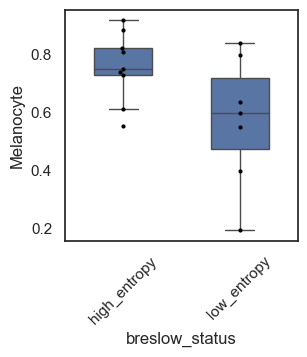

In [65]:
subset=['LSP13150_025','LSP13170_004','LSP13170_002','LSP13170_003','LSP13985_014','LSP13985_009','LSP13985_015','LSP13150_018','LSP13150_004','LSP13140_001','LSP13135_026','LSP13165_017','LSP13987_008','LSP13985_003','LSP13165_032','LSP13165_037']
order=['LSP13140_001','LSP13150_025','LSP13135_026','LSP13165_017','LSP13985_009','LSP13987_008','LSP13985_014','LSP13165_032','LSP13165_037','LSP13170_003','LSP13985_015','LSP13170_004','LSP13985_003','LSP13150_004','LSP13150_018','LSP13170_002']
order_y=['Melanocyte','Keratinocytes','Endothelial cells','Myofibroblasts',
   'CD8+ T cells','T helpers','T reg','Partially Exhausted CTL','Exhausted CTL',
  'Macrophage','Monocyte','Myeloid lineage','DC','LC','B cells']    
b=sm.pl.stacked_barplot(adata, y_axis='phenotype_v2', x_axis='ROI_GeoMX', 
                      subset_xaxis=subset, subset_yaxis=order_y, order_xaxis=order, order_yaxis=order_y, 
                      method='percent', figsize=(4,2), return_data=True,saveDir="C:/Users/tav9/Dropbox (HMS)/test/test/")
b.to_csv(r"C:\Users\tav9\Dropbox (HMS)\test\celltype.csv")
b=pd.read_csv(r"C:\Users\tav9\Dropbox (HMS)\test\celltype.csv")
df2=pd.DataFrame(b)

low_entropy=['LSP13150_025','LSP13170_004','LSP13170_002','LSP13170_003','LSP13985_014','LSP13985_009','LSP13985_015']
high_entropy=['LSP13150_018','LSP13150_004','LSP13140_001','LSP13135_026','LSP13165_017','LSP13987_008','LSP13985_003','LSP13165_032','LSP13165_037']

# Add the recurrence_status column
df2['breslow_status'] = df2['ROI_GeoMX'].apply(lambda x: 'low_entropy' if x in low_entropy else 'high_entropy')
print(df2)

plt.rcParams["figure.figsize"] = (3,3)
df2=df2.sort_values(by='breslow_status', ascending=True)

import scipy.stats as stats
sns.swarmplot(data=df2,x='breslow_status',y='Melanocyte',color='black',s=3)
ax=sns.boxplot(data=df2,x='breslow_status',y='Melanocyte',width=.5, fliersize=False)
ax.set_xticklabels(ax.get_xticklabels(),rotation=45)

group1=df2[df2['breslow_status']=='low_entropy']
group2=df2[df2['breslow_status']=='high_entropy']

statistic, p_value = stats.mannwhitneyu(group1['Melanocyte'],group2['Melanocyte'])
print("p-value=",p_value)
plt.savefig("C:/Users/tav9/Dropbox (HMS)/test/test/entropygroups_Melanocyte.pdf")

Saved plot to C:/Users/tav9/Dropbox (HMS)/test/test/stacked_barplot_expanded.pdf
       ROI_GeoMX_expanded  Melanocyte  Keratinocytes  Endothelial cells  \
0   LSP13140_001_expanded    0.628443       0.000000           0.111467   
1   LSP13150_025_expanded    0.329418       0.038304           0.091420   
2   LSP13135_026_expanded    0.395857       0.000000           0.147256   
3   LSP13165_017_expanded    0.429881       0.031775           0.028720   
4   LSP13985_009_expanded    0.436323       0.444075           0.085271   
5   LSP13987_008_expanded    0.909470       0.016081           0.023228   
6   LSP13985_014_expanded    0.475177       0.284701           0.123607   
7   LSP13165_032_expanded    0.633305       0.067704           0.064340   
8   LSP13165_037_expanded    0.545098       0.114510           0.076863   
9   LSP13170_003_expanded    0.803109       0.094560           0.032383   
10  LSP13985_015_expanded    0.277835       0.000000           0.179775   
11  LSP13170_004_ex

C:\Users\tav9\AppData\Local\Temp\ipykernel_22620\2972668007.py:25: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



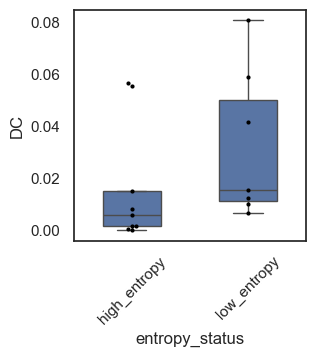

In [82]:
low_entropy=['LSP13150_025_expanded','LSP13170_004_expanded','LSP13170_002_expanded','LSP13170_003_expanded','LSP13985_014_expanded','LSP13985_009_expanded','LSP13985_015_expanded']
high_entropy=['LSP13150_018_expanded','LSP13150_004_expanded','LSP13140_001_expanded','LSP13135_026_expanded','LSP13165_017_expanded','LSP13987_008_expanded','LSP13985_003_expanded','LSP13165_032_expanded','LSP13165_037_expanded']

subset=['LSP13150_025_expanded','LSP13170_004_expanded','LSP13170_002_expanded','LSP13170_003_expanded','LSP13985_014_expanded','LSP13985_009_expanded','LSP13985_015_expanded','LSP13150_018_expanded','LSP13150_004_expanded','LSP13140_001_expanded','LSP13135_026_expanded','LSP13165_017_expanded','LSP13987_008_expanded','LSP13985_003_expanded','LSP13165_032_expanded','LSP13165_037_expanded']

order=['LSP13140_001_expanded','LSP13150_025_expanded','LSP13135_026_expanded','LSP13165_017_expanded','LSP13985_009_expanded','LSP13987_008_expanded','LSP13985_014_expanded','LSP13165_032_expanded','LSP13165_037_expanded','LSP13170_003_expanded','LSP13985_015_expanded','LSP13170_004_expanded','LSP13985_003_expanded','LSP13150_004_expanded','LSP13150_018_expanded','LSP13170_002_expanded']

order_y=['Melanocyte','Keratinocytes','Endothelial cells','Myofibroblasts',
   'CD8+ T cells','T helpers','T reg','Partially Exhausted CTL','Exhausted CTL',
  'Macrophage','Monocyte','Myeloid lineage','DC','LC','B cells']    

b=sm.pl.stacked_barplot(adata, y_axis='phenotype_v2', x_axis='ROI_GeoMX_expanded', 
                      subset_xaxis=subset, subset_yaxis=order_y, order_xaxis=order, order_yaxis=order_y, 
                      method='percent', figsize=(4,2), return_data=True,fileName='stacked_barplot_expanded.pdf',
                        saveDir="C:/Users/tav9/Dropbox (HMS)/test/test/")
b.to_csv(r"C:\Users\tav9\Dropbox (HMS)\test\celltype.csv")
b=pd.read_csv(r"C:\Users\tav9\Dropbox (HMS)\test\celltype.csv")
df2=pd.DataFrame(b)

df2['entropy_status'] = df2['ROI_GeoMX_expanded'].apply(lambda x: 'low_entropy' if x in low_entropy else 'high_entropy')
print(df2)

sns.swarmplot(data=df2,x='entropy_status',y='DC',color='black',s=3)
ax=sns.boxplot(data=df2,x='entropy_status',y='DC',width=.5, fliersize=False)
ax.set_xticklabels(ax.get_xticklabels(),rotation=45)

group1=df2[df2['entropy_status']=='low_entropy']
group2=df2[df2['entropy_status']=='high_entropy']

statistic, p_value = stats.mannwhitneyu(group1['DC'],group2['DC'])
print("p-value=",p_value)
plt.savefig("C:/Users/tav9/Dropbox (HMS)/test/test/entropygroups_expanded_DC.pdf")

In [11]:
rename= {'CD8+ T cells': ['CD8+ T cells','Exhausted CTL','Partially Exhausted CTL']}
adata = sm.hl.rename(adata, rename, from_column='phenotype_v2', to_column='phenotype_tcell_combined')

Renaming CD8+ T cells to CD8+ T cells
Renaming Exhausted CTL to CD8+ T cells
Renaming Partially Exhausted CTL to CD8+ T cells


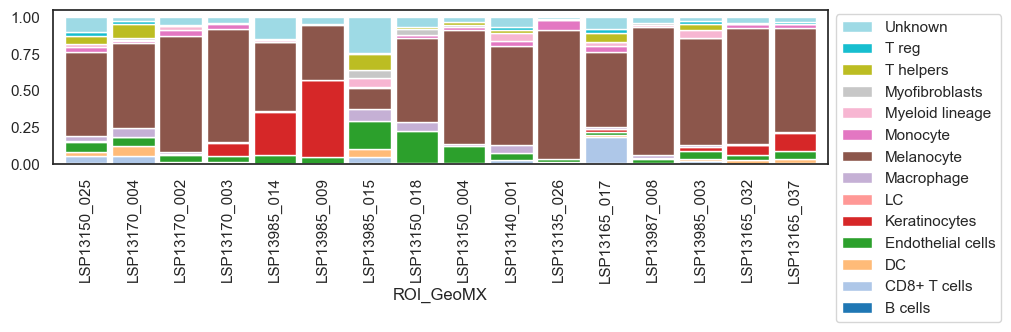

       ROI_GeoMX   B cells  CD8+ T cells        DC  Endothelial cells  \
0   LSP13150_025  0.003337      0.051168  0.027809           0.066741   
1   LSP13170_004  0.001924      0.051956  0.066709           0.065427   
2   LSP13170_002  0.000000      0.000000  0.015453           0.048565   
3   LSP13170_003  0.000000      0.000000  0.015695           0.040359   
4   LSP13985_014  0.000000      0.000000  0.002628           0.059133   
5   LSP13985_009  0.000000      0.000000  0.000000           0.045455   
6   LSP13985_015  0.003540      0.046018  0.054867           0.191150   
7   LSP13150_018  0.000000      0.006980  0.002538           0.217005   
8   LSP13150_004  0.000000      0.004021  0.002681           0.116622   
9   LSP13140_001  0.000000      0.026061  0.000000           0.046910   
10  LSP13135_026  0.000000      0.012255  0.000000           0.024510   
11  LSP13165_017  0.003584      0.181004  0.010305           0.021953   
12  LSP13987_008  0.000000      0.000000  0.003943 

C:\Users\tav9\AppData\Local\Temp\ipykernel_22620\506055380.py:23: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



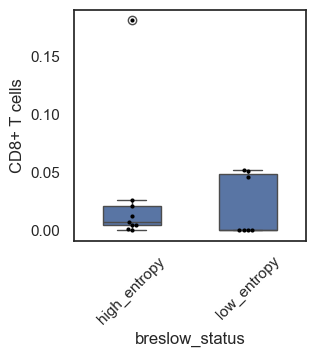

In [12]:
subset=['LSP13150_025','LSP13170_004','LSP13170_002','LSP13170_003','LSP13985_014','LSP13985_009','LSP13985_015','LSP13150_018','LSP13150_004','LSP13140_001','LSP13135_026','LSP13165_017','LSP13987_008','LSP13985_003','LSP13165_032','LSP13165_037']

b=sm.pl.stacked_barplot(adata, y_axis='phenotype_tcell_combined', x_axis='ROI_GeoMX', 
                      subset_xaxis=subset, subset_yaxis=None, order_xaxis=subset, order_yaxis=None, 
                      method='percent', figsize=(10,2), return_data=True)
b.to_csv(r"C:\Users\tav9\Dropbox (HMS)\test\celltype.csv")
b=pd.read_csv(r"C:\Users\tav9\Dropbox (HMS)\test\celltype.csv")
df2=pd.DataFrame(b)

low_entropy=['LSP13150_025','LSP13170_004','LSP13170_002','LSP13170_003','LSP13985_014','LSP13985_009','LSP13985_015']
high_entropy=['LSP13150_018','LSP13150_004','LSP13140_001','LSP13135_026','LSP13165_017','LSP13987_008','LSP13985_003','LSP13165_032','LSP13165_037']

# Add the recurrence_status column
df2['breslow_status'] = df2['ROI_GeoMX'].apply(lambda x: 'low_entropy' if x in low_entropy else 'high_entropy')
print(df2)

plt.rcParams["figure.figsize"] = (3,3)
df2=df2.sort_values(by='breslow_status', ascending=True)

import scipy.stats as stats
sns.swarmplot(data=df2,x='breslow_status',y='CD8+ T cells',color='black',s=3)
ax=sns.boxplot(data=df2,x='breslow_status',y='CD8+ T cells',width=.5)
ax.set_xticklabels(ax.get_xticklabels(),rotation=45)

group1=df2[df2['breslow_status']=='low_entropy']
group2=df2[df2['breslow_status']=='high_entropy']

statistic, p_value = stats.mannwhitneyu(group1['CD8+ T cells'],group2['CD8+ T cells'])
print("p-value=",p_value)

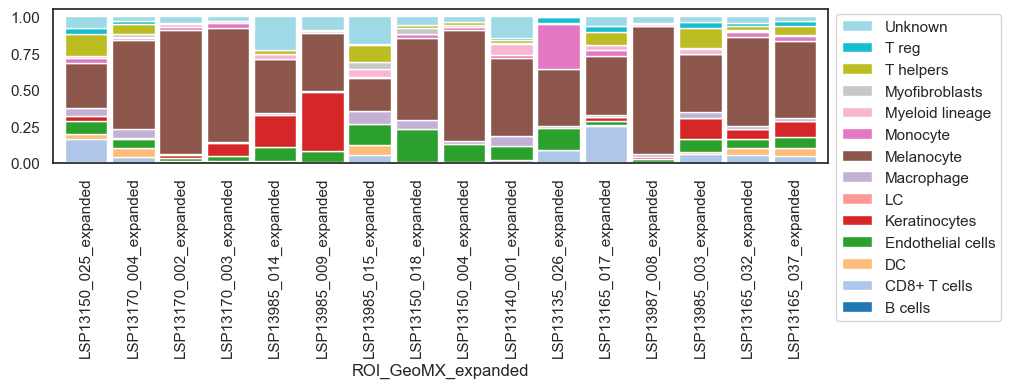

       ROI_GeoMX_expanded   B cells  CD8+ T cells        DC  \
0   LSP13150_025_expanded  0.006118      0.156235  0.038118   
1   LSP13170_004_expanded  0.001427      0.041865  0.057088   
2   LSP13170_002_expanded  0.000000      0.000000  0.011751   
3   LSP13170_003_expanded  0.000000      0.000000  0.015038   
4   LSP13985_014_expanded  0.000000      0.003125  0.007812   
5   LSP13985_009_expanded  0.000000      0.000000  0.006018   
6   LSP13985_015_expanded  0.003325      0.051538  0.065669   
7   LSP13150_018_expanded  0.000000      0.007311  0.001625   
8   LSP13150_004_expanded  0.000000      0.007317  0.001626   
9   LSP13140_001_expanded  0.000000      0.023991  0.000000   
10  LSP13135_026_expanded  0.001115      0.089794  0.000558   
11  LSP13165_017_expanded  0.007703      0.243081  0.007703   
12  LSP13987_008_expanded  0.000000      0.000000  0.005695   
13  LSP13985_003_expanded  0.000000      0.063817  0.014250   
14  LSP13165_032_expanded  0.001205      0.050623  0.05

C:\Users\tav9\AppData\Local\Temp\ipykernel_22620\2215762009.py:18: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



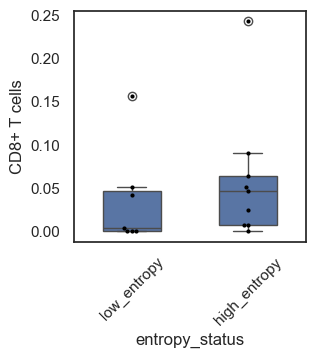

In [13]:
low_entropy=['LSP13150_025_expanded','LSP13170_004_expanded','LSP13170_002_expanded','LSP13170_003_expanded','LSP13985_014_expanded','LSP13985_009_expanded','LSP13985_015_expanded']
high_entropy=['LSP13150_018_expanded','LSP13150_004_expanded','LSP13140_001_expanded','LSP13135_026_expanded','LSP13165_017_expanded','LSP13987_008_expanded','LSP13985_003_expanded','LSP13165_032_expanded','LSP13165_037_expanded']

subset=['LSP13150_025_expanded','LSP13170_004_expanded','LSP13170_002_expanded','LSP13170_003_expanded','LSP13985_014_expanded','LSP13985_009_expanded','LSP13985_015_expanded','LSP13150_018_expanded','LSP13150_004_expanded','LSP13140_001_expanded','LSP13135_026_expanded','LSP13165_017_expanded','LSP13987_008_expanded','LSP13985_003_expanded','LSP13165_032_expanded','LSP13165_037_expanded']

b=sm.pl.stacked_barplot(adata, y_axis='phenotype_tcell_combined', x_axis='ROI_GeoMX_expanded', 
                      subset_xaxis=subset, subset_yaxis=None, order_xaxis=subset, order_yaxis=None, 
                      method='percent', figsize=(10,2), return_data=True)
b.to_csv(r"C:\Users\tav9\Dropbox (HMS)\test\celltype.csv")
b=pd.read_csv(r"C:\Users\tav9\Dropbox (HMS)\test\celltype.csv")
df2=pd.DataFrame(b)

df2['entropy_status'] = df2['ROI_GeoMX_expanded'].apply(lambda x: 'low_entropy' if x in low_entropy else 'high_entropy')
print(df2)

sns.swarmplot(data=df2,x='entropy_status',y='CD8+ T cells',color='black',s=3)
ax=sns.boxplot(data=df2,x='entropy_status',y='CD8+ T cells',width=.5)
ax.set_xticklabels(ax.get_xticklabels(),rotation=45)

group1=df2[df2['entropy_status']=='low_entropy']
group2=df2[df2['entropy_status']=='high_entropy']

statistic, p_value = stats.mannwhitneyu(group1['CD8+ T cells'],group2['CD8+ T cells'])
print("p-value=",p_value)


In [84]:
adata.obs.phenotype_v2.value_counts()

phenotype_v2
Melanocyte                 359098
Keratinocytes              268328
Endothelial cells          156535
Unknown                    135870
T helpers                  107749
CD8+ T cells                97446
Macrophage                  79452
Monocyte                    48269
Myofibroblasts              44701
T reg                       38260
Exhausted CTL               26524
DC                          25744
Myeloid lineage             19997
B cells                      6673
Partially Exhausted CTL      4948
LC                           1741
Name: count, dtype: int64

Saved plot to C:/Users/tav9/Dropbox (HMS)/test/test/stacked_barplot.pdf
       ROI_GeoMX  Keratinocytes  Endothelial cells  Myofibroblasts  \
0   LSP13140_001       0.000000           0.184751        0.000000   
1   LSP13150_025       0.016892           0.202703        0.000000   
2   LSP13135_026       0.000000           0.212766        0.000000   
3   LSP13165_017       0.056277           0.053030        0.003247   
4   LSP13985_009       0.908136           0.078740        0.000000   
5   LSP13987_008       0.108911           0.346535        0.138614   
6   LSP13985_014       0.762887           0.154639        0.003436   
7   LSP13165_032       0.389313           0.187023        0.003817   
8   LSP13165_037       0.493506           0.218182        0.000000   
9   LSP13170_003       0.459770           0.206897        0.000000   
10  LSP13985_015       0.000000           0.312139        0.086705   
11  LSP13170_004       0.000000           0.165584        0.032468   
12  LSP13985_003  

C:\Users\tav9\AppData\Local\Temp\ipykernel_22620\1999362260.py:26: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



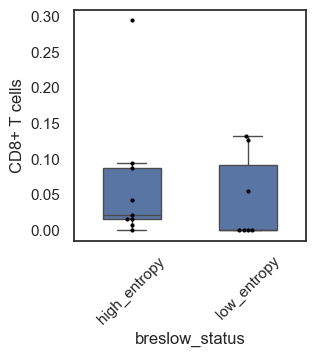

In [85]:
subset=['LSP13150_025','LSP13170_004','LSP13170_002','LSP13170_003','LSP13985_014','LSP13985_009','LSP13985_015','LSP13150_018','LSP13150_004','LSP13140_001','LSP13135_026','LSP13165_017','LSP13987_008','LSP13985_003','LSP13165_032','LSP13165_037']
order=['LSP13140_001','LSP13150_025','LSP13135_026','LSP13165_017','LSP13985_009','LSP13987_008','LSP13985_014','LSP13165_032','LSP13165_037','LSP13170_003','LSP13985_015','LSP13170_004','LSP13985_003','LSP13150_004','LSP13150_018','LSP13170_002']
order_y=['Keratinocytes','Endothelial cells','Myofibroblasts',
   'CD8+ T cells','T helpers','T reg','Partially Exhausted CTL','Exhausted CTL',
  'Macrophage','Monocyte','Myeloid lineage','DC','LC','B cells']    
b=sm.pl.stacked_barplot(adata, y_axis='phenotype_v2', x_axis='ROI_GeoMX', 
                      subset_xaxis=subset, subset_yaxis=order_y, order_xaxis=order, order_yaxis=order_y, 
                      method='percent', figsize=(4,2), return_data=True,saveDir="C:/Users/tav9/Dropbox (HMS)/test/test/")
b.to_csv(r"C:\Users\tav9\Dropbox (HMS)\test\celltype.csv")
b=pd.read_csv(r"C:\Users\tav9\Dropbox (HMS)\test\celltype.csv")
df2=pd.DataFrame(b)

low_entropy=['LSP13150_025','LSP13170_004','LSP13170_002','LSP13170_003','LSP13985_014','LSP13985_009','LSP13985_015']
high_entropy=['LSP13150_018','LSP13150_004','LSP13140_001','LSP13135_026','LSP13165_017','LSP13987_008','LSP13985_003','LSP13165_032','LSP13165_037']

# Add the recurrence_status column
df2['breslow_status'] = df2['ROI_GeoMX'].apply(lambda x: 'low_entropy' if x in low_entropy else 'high_entropy')
print(df2)

plt.rcParams["figure.figsize"] = (3,3)
df2=df2.sort_values(by='breslow_status', ascending=True)

import scipy.stats as stats
sns.swarmplot(data=df2,x='breslow_status',y='CD8+ T cells',color='black',s=3)
ax=sns.boxplot(data=df2,x='breslow_status',y='CD8+ T cells',width=.5, fliersize=False)
ax.set_xticklabels(ax.get_xticklabels(),rotation=45)

group1=df2[df2['breslow_status']=='low_entropy']
group2=df2[df2['breslow_status']=='high_entropy']

statistic, p_value = stats.mannwhitneyu(group1['CD8+ T cells'],group2['CD8+ T cells'])
print("p-value=",p_value)
#plt.savefig("C:/Users/tav9/Dropbox (HMS)/test/test/entropygroups_Melanocyte.pdf")